<a href="https://colab.research.google.com/github/mkane968/Text-Mining-Experiments/blob/main/NLTK/NLTK_Master_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NLTK Master Tutorial

## Tutorial 1: Library Imports and NLTK.text Analysis

###***Downloading Libraries and Testing That They Are Working***

Install and import necessary libraries to prepare for text analysis (need to run ! pip install for those not in Colab by default)

In [ ]:
import nltk # https://www.nltk.org/install.html
import numpy # https://www.scipy.org/install.html
import matplotlib.pyplot # https://matplotlib.org/downloads.html
import tweepy # https://github.com/tweepy/tweepy
!pip install TwitterSearch
import TwitterSearch # https://github.com/ckoepp/TwitterSearch
!pip install unidecode
import unidecode # https://pypi.python.org/pypi/Unidecode
!pip install langdetect
import langdetect # https://pypi.python.org/pypi/langdetect
!pip install langid
import langid # https://github.com/saffsd/langid.py
import gensim # https://radimrehurek.com/gensim/install.html

Download NLTK packages including punkt and stopwords 

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.text import Text
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('reuters')

Import and unzip Reuters corpus

In [ ]:
from nltk.corpus import reuters
nltk.download('reuters')
!unzip /root/nltk_data/corpora/reuters.zip -d /root/nltk_data/corpora/.

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
Archive:  /root/nltk_data/corpora/reuters.zip
replace /root/nltk_data/corpora/./reuters/cats.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### ***Text Analysis Using NLTK***

Conduct basic tokenization and text analysis using NLTK.text module (concordancing, collocations, counting and indexing, distributional similarity, dispersion plot, plot, vocab, common contexts)

Split string into tokens

In [ ]:
my_string = "Two plus two is four, minus one that's three — quick maths. Every day man's on the block. Smoke trees. See your girl in the park, that girl is an uckers. When the thing went quack quack quack, your men were ducking! Hold tight Asznee, my brother. He's got a pumpy. Hold tight my man, my guy. He's got a frisbee. I trap, trap, trap on the phone. Moving that cornflakes, rice crispies. Hold tight my girl Whitney."
tokens = word_tokenize(my_string)

['two', 'plus', 'two', 'is', 'four']

Lowercase tokens, then print first five tokens

In [ ]:
tokens = [word.lower() for word in tokens]
tokens[:5]

['two', 'plus', 'two', 'is', 'four']

Assign text of tokens to variable t

In [ ]:
t = Text(tokens)
t

<Text: two plus two is four , minus one...>

This method of converting raw strings to NLTK Text instances can be used when reading text from a file. For instance: f = open('my-file.txt','rU') 

Opening a file with the mode 'U' or 'rU' will open a file for reading in universal newline mode. All three line ending conventions will be translated to a "\n"

raw = f.read()

####***Get Concordances*** 
Concordance() is a method of the Text class of NLTK. It finds words and displays a context window. Word matching is not case-sensitive.

`Concordance() `is defined as follows: concordance(self, word, width=79, lines=25). Note default values for optional params.

In [ ]:
t.concordance('uckers')

Displaying 1 of 1 matches:
 girl in the park , that girl is an uckers . when the thing went quack quack q


####***Get Collocations*** 
Find multiple words which commonly co-occur

def collocations(self, num=20, window_size=2). num is the max no. of collocations to print.

In [ ]:
t.collocations() 

hold tight; quack quack


####***Get Count*** 
Find frequency of word appearance

In [ ]:
t.count('quack')

3

####***Get Index*** 
Find position of word in text

In [ ]:
t.index('two')

0

#### ***Get Distributional Similarity*** 
Find other words which appear in the same contexts as the specified word; list most similar words first.


In [ ]:
t.similar('brother') #similar(self, word, num=20)

guy


####***Make Dispersion Plot*** 
Find and plot instances of word(s) as distributed across text. Reveals patterns in word positions. Each stripe represents an instance of a word, and each row represents the entire text.

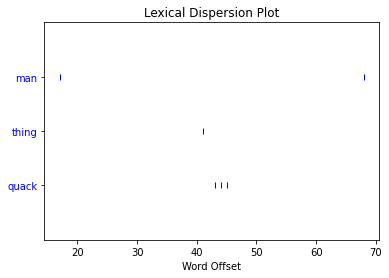

In [ ]:
t.dispersion_plot(['man', 'thing', 'quack']) 

####***Make Frequency Plot*** 
Find and plot specified number of most common tokens

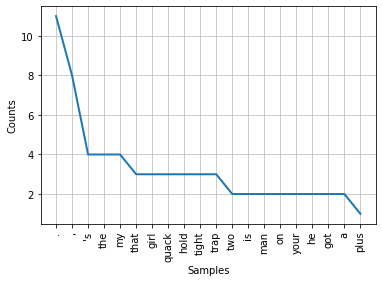

In [ ]:
t.plot(20) # plots 20 most common tokens

####***Get Most Frequent Vocab*** 
Find frequency of each token in text

In [ ]:
t.vocab()

FreqDist({'!': 1,
          "'s": 4,
          ',': 8,
          '.': 11,
          'a': 2,
          'an': 1,
          'asznee': 1,
          'block': 1,
          'brother': 1,
          'cornflakes': 1,
          'crispies': 1,
          'day': 1,
          'ducking': 1,
          'every': 1,
          'four': 1,
          'frisbee': 1,
          'girl': 3,
          'got': 2,
          'guy': 1,
          'he': 2,
          'hold': 3,
          'i': 1,
          'in': 1,
          'is': 2,
          'man': 2,
          'maths': 1,
          'men': 1,
          'minus': 1,
          'moving': 1,
          'my': 4,
          'on': 2,
          'one': 1,
          'park': 1,
          'phone': 1,
          'plus': 1,
          'pumpy': 1,
          'quack': 3,
          'quick': 1,
          'rice': 1,
          'see': 1,
          'smoke': 1,
          'that': 3,
          'the': 4,
          'thing': 1,
          'three': 1,
          'tight': 3,
          'trap': 3,
          'tre

####***Get Common Contexts*** 
Given two words used similarly, displays where in the text they were used similarly

Our text is too small, so we will use a bigger one.

NLTK comes with several interesting corpora, which are large collections of text. You can check out what kinds of corpora are found at http://www.nltk.org/nltk_data/ 

reuters is a corpus of news documents. More specifically, reuters is a corpus reader for the Reuters corpus which provides us with methods to access the corpus:

In [ ]:
text = Text(reuters.words()) 

in_1986 and_and by_. begins_1 paid_1986 in_, early_. or_, /_shipment
of_. last_. for_shipment for_to on_3 on_12 on_19 last_when in_.
in_1987 -_.


It seems that .common_contexts() takes 2 words which are used similarly and displays where they are used similarly. It also seems that '_' indicates where the words would be in the text.


In [ ]:
text.common_contexts(['August', 'June']) 

in_1986 and_and by_. begins_1 paid_1986 in_, early_. or_, /_shipment
of_. last_. for_shipment for_to on_3 on_12 on_19 last_when in_.
in_1987 -_.


## Tutorial 2: Methods of Language Identification 
### (N-Gram, Stopword and Word Bigram Analysis)

**Tutorial 2.1: Deriving N-Grams from Text**

Based on [N-Gram-Based Text Categorization: Categorizing Text With Python by Alejandro Nolla](http://blog.alejandronolla.com/2013/05/20/n-gram-based-text-categorization-categorizing-text-with-python/)

What are n-grams? See [here](https://cloudmark.github.io/Language-Detection/).

***Tokenization:*** Divides strings of text into substrings of letters and apostrophes ONLY to prepare for n-gram analysis

In [ ]:
#Lowercase text in string
s = "Le temps est un grand maître, dit-on, le malheur est qu'il tue ses élèves."
s = s.lower()

In [ ]:
#Import regular expressions tokenizer and tokenize string
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[a-zA-Z'`éèî]+")
s_tokenized = tokenizer.tokenize(s)
s_tokenized

['le',
 'temps',
 'est',
 'un',
 'grand',
 'maître',
 'dit',
 'on',
 'le',
 'malheur',
 'est',
 "qu'il",
 'tue',
 'ses',
 'élèves']

***Generating N-Grams:*** Finds n-length slices of a longer string, typically overlapping/in sequence; can be used for language detection

Import ngrams module and create list for generated ngrams

In [ ]:
from nltk.util import ngrams
generated_4grams = []



Generate ngram for each word in tokenized string

In [ ]:
for word in s_tokenized:
    generated_4grams.append(list(ngrams(word, 4, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_'))) # n = 4.
#generated_4grams

It seems that generated_4grams needs flattening since it's supposed to be a list of 4-grams:

In [ ]:
generated_4grams = [word for sublist in generated_4grams for word in sublist]
#generated_4grams[:10]

Obtaining n-grams (n = 4)
Join 4grams into list of strings

In [ ]:
ng_list_4grams = generated_4grams
for idx, val in enumerate(generated_4grams):
    ng_list_4grams[idx] = ''.join(val)
#ng_list_4grams

Sort n-grams by how frequently they appear within the text. First, create list for n-grams sorted by frequency, iterate through ngrams and add to freq_4grams list as many times as appearing in list of strings

In [ ]:
freq_4grams = {}

for ngram in ng_list_4grams:
    if ngram not in freq_4grams:
        freq_4grams.update({ngram: 1})
    else:
        ngram_occurrences = freq_4grams[ngram]
        freq_4grams.update({ngram: ngram_occurrences + 1})
      

The operator module exports a set of efficient functions corresponding to the intrinsic operators of Python. For example, operator.add(x, y) is equivalent to the expression x + y.


In [ ]:
from operator import itemgetter 

We only keep the 300 most popular n-grams. This was suggested in the original paper written about n-grams.

In [ ]:
freq_4grams_sorted = sorted(freq_4grams.items(), key=itemgetter(1), reverse=True)[0:300] 
#freq_4grams_sorted

Obtain n-grams for multiple values of n (n = 1, 2, 3, 4)
For the code below we need the raw sentence as opposed to the tokens.

In [ ]:
from nltk import everygrams

s_clean = ' '.join(s_tokenized) 
s_clean

"le temps est un grand maître dit on le malheur est qu'il tue ses élèves"

Define ngram extractor generating uni-grams, bigrams, trigrams and 4-grams of string (range set to 1-4)

In [ ]:
def ngram_extractor(sent):
    return [''.join(ng) for ng in everygrams(sent.replace(' ', '_ _'), 1, 4) 
            if ' ' not in ng and '\n' not in ng and ng != ('_',)]

#ngram_extractor(s_clean)

**Tutorial 2.2: Detecting Text Language by Counting Stopwords** 

Based on [Detecting Text Language With Python and NLTK by Alejandro Nolla](http://blog.alejandronolla.com/2013/05/15/detecting-text-language-with-python-and-nltk/)

Stop words are words which are filtered out before processing because they are mostly grammatical as opposed to semantic in nature (e.g. search engines remove words like 'want')

Tokenize text, regex-based tokenizer splitting text on whitespace and punctuation (except for underscore)

In [ ]:
text = "Yo man, it's time for you to shut yo' mouth! I ain't even messin' dawg."
import sys

try:
    from nltk.tokenize import wordpunct_tokenize 
except ImportError:
    print('[!] You need to install nltk (http://nltk.org/index.html)')
test_tokens = wordpunct_tokenize(text)
#test_tokens

There are other tokenizers e.g. RegexpTokenizer where you can enter your own regexp, WhitespaceTokenizer (similar to Python's string.split()) and BlanklineTokenizer.

**Exploring NLTK Stopword Corpus** 

NLTK comes with a corpus of stop words in various languages.

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Since this is raw text, we need to replace \n's with spaces for it to be readable.

In [ ]:
stopwords.readme().replace('\n', ' ') 

'Stopwords Corpus  This corpus contains lists of stop words for several languages.  These are high-frequency grammatical words which are usually ignored in text retrieval applications.  They were obtained from: http://anoncvs.postgresql.org/cvsweb.cgi/pgsql/src/backend/snowball/stopwords/  The stop words for the Romanian language were obtained from: http://arlc.ro/resources/  The English list has been augmented https://github.com/nltk/nltk_data/issues/22  The German list has been corrected https://github.com/nltk/nltk_data/pull/49  A Kazakh list has been added https://github.com/nltk/nltk_data/pull/52  A Nepali list has been added https://github.com/nltk/nltk_data/pull/83  An Azerbaijani list has been added https://github.com/nltk/nltk_data/pull/100  A Greek list has been added https://github.com/nltk/nltk_data/pull/103  An Indonesian list has been added https://github.com/nltk/nltk_data/pull/112 '

Most corpora consist of a set of files, each containing a piece of text. A list of identifiers for these files is accessed via fileids(). Here you can see the list of languages the corpus contains


In [ ]:
stopwords.fileids() 

['arabic',
 'azerbaijani',
 'bengali',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

Explore raw corpus of Greek stopwords 

In [ ]:
stopwords.raw('greek')

"αλλα\nαν\nαντι\nαπο\nαυτα\nαυτεσ\nαυτη\nαυτο\nαυτοι\nαυτοσ\nαυτουσ\nαυτων\nαἱ\nαἳ\nαἵ\nαὐτόσ\nαὐτὸς\nαὖ\nγάρ\nγα\nγα^\nγε\nγια\nγοῦν\nγὰρ\nδ'\nδέ\nδή\nδαί\nδαίσ\nδαὶ\nδαὶς\nδε\nδεν\nδι'\nδιά\nδιὰ\nδὲ\nδὴ\nδ’\nεαν\nειμαι\nειμαστε\nειναι\nεισαι\nειστε\nεκεινα\nεκεινεσ\nεκεινη\nεκεινο\nεκεινοι\nεκεινοσ\nεκεινουσ\nεκεινων\nενω\nεπ\nεπι\nεἰ\nεἰμί\nεἰμὶ\nεἰς\nεἰσ\nεἴ\nεἴμι\nεἴτε\nη\nθα\nισωσ\nκ\nκαί\nκαίτοι\nκαθ\nκαι\nκατ\nκατά\nκατα\nκατὰ\nκαὶ\nκι\nκἀν\nκἂν\nμέν\nμή\nμήτε\nμα\nμε\nμεθ\nμετ\nμετά\nμετα\nμετὰ\nμη\nμην\nμἐν\nμὲν\nμὴ\nμὴν\nνα\nο\nοι\nομωσ\nοπωσ\nοσο\nοτι\nοἱ\nοἳ\nοἷς\nοὐ\nοὐδ\nοὐδέ\nοὐδείσ\nοὐδεὶς\nοὐδὲ\nοὐδὲν\nοὐκ\nοὐχ\nοὐχὶ\nοὓς\nοὔτε\nοὕτω\nοὕτως\nοὕτωσ\nοὖν\nοὗ\nοὗτος\nοὗτοσ\nπαρ\nπαρά\nπαρα\nπαρὰ\nπερί\nπερὶ\nποια\nποιεσ\nποιο\nποιοι\nποιοσ\nποιουσ\nποιων\nποτε\nπου\nποῦ\nπρο\nπροσ\nπρόσ\nπρὸ\nπρὸς\nπως\nπωσ\nσε\nστη\nστην\nστο\nστον\nσόσ\nσύ\nσύν\nσὸς\nσὺ\nσὺν\nτά\nτήν\nτί\nτίς\nτίσ\nτα\nταῖς\nτε\nτην\nτησ\nτι\nτινα\nτις\nτισ\nτο\nτοί\nτοι\nτοιοῦτος\nτοιοῦτοσ\nτον\nτοτε\

Clean Greek stopwards by \n with space

In [ ]:
stopwords.raw('greek').replace('\n', ' ') # Better

"αλλα αν αντι απο αυτα αυτεσ αυτη αυτο αυτοι αυτοσ αυτουσ αυτων αἱ αἳ αἵ αὐτόσ αὐτὸς αὖ γάρ γα γα^ γε για γοῦν γὰρ δ' δέ δή δαί δαίσ δαὶ δαὶς δε δεν δι' διά διὰ δὲ δὴ δ’ εαν ειμαι ειμαστε ειναι εισαι ειστε εκεινα εκεινεσ εκεινη εκεινο εκεινοι εκεινοσ εκεινουσ εκεινων ενω επ επι εἰ εἰμί εἰμὶ εἰς εἰσ εἴ εἴμι εἴτε η θα ισωσ κ καί καίτοι καθ και κατ κατά κατα κατὰ καὶ κι κἀν κἂν μέν μή μήτε μα με μεθ μετ μετά μετα μετὰ μη μην μἐν μὲν μὴ μὴν να ο οι ομωσ οπωσ οσο οτι οἱ οἳ οἷς οὐ οὐδ οὐδέ οὐδείσ οὐδεὶς οὐδὲ οὐδὲν οὐκ οὐχ οὐχὶ οὓς οὔτε οὕτω οὕτως οὕτωσ οὖν οὗ οὗτος οὗτοσ παρ παρά παρα παρὰ περί περὶ ποια ποιεσ ποιο ποιοι ποιοσ ποιουσ ποιων ποτε που ποῦ προ προσ πρόσ πρὸ πρὸς πως πωσ σε στη στην στο στον σόσ σύ σύν σὸς σὺ σὺν τά τήν τί τίς τίσ τα ταῖς τε την τησ τι τινα τις τισ το τοί τοι τοιοῦτος τοιοῦτοσ τον τοτε του τούσ τοὺς τοῖς τοῦ των τό τόν τότε τὰ τὰς τὴν τὸ τὸν τῆς τῆσ τῇ τῶν τῷ ωσ ἀλλ' ἀλλά ἀλλὰ ἀλλ’ ἀπ ἀπό ἀπὸ ἀφ ἂν ἃ ἄλλος ἄλλοσ ἄν ἄρα ἅμα ἐάν ἐγώ ἐγὼ ἐκ ἐμόσ ἐμὸς ἐν ἐξ ἐπί ἐπεὶ 

List first 10 English stopwords

In [ ]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

We can also use .sents() which returns sentences. However, in our particular case, this will cause an error:

In [ ]:
stopwords.sents('greek')

AttributeError: ignored

The error is because the stopwords corpus reader is of type WordListCorpusReader so there are no sentences. It's the same for .paras().

Count number of stopwords in English and Greek. There is a total of 444 Greek and English stop words

In [ ]:
len(stopwords.words(['english', 'greek'])) 

444

***Classifying texts based on stopwords:*** Loop through the list of stop words in all languages and check how many stop words our test text contains in each language. The text is then classified to be in the language in which it has the most stop words

Create empty list to store ratio of stopwords in each language

In [ ]:
language_ratios = {}

Lowercase all tokens in test_tokens ("Yo man, it's time for you to shut yo' mouth! I ain't even messin' dawg.")


In [ ]:

test_words = [word.lower() for word in test_tokens] 
test_words_set = set(test_words)

Iterate through test_tokens and output number of stopwords in each language the string contains


In [ ]:
for language in stopwords.fileids():
    stopwords_set = set(stopwords.words(language)) # For some languages eg. Russian, it would be a wise idea to tokenize the stop words by punctuation too.
    common_elements = test_words_set.intersection(stopwords_set)
    language_ratios[language] = len(common_elements) # language "score"
    
language_ratios

{'arabic': 0,
 'azerbaijani': 0,
 'bengali': 0,
 'danish': 3,
 'dutch': 0,
 'english': 8,
 'finnish': 0,
 'french': 2,
 'german': 1,
 'greek': 0,
 'hungarian': 1,
 'indonesian': 0,
 'italian': 1,
 'kazakh': 0,
 'nepali': 0,
 'norwegian': 3,
 'portuguese': 1,
 'romanian': 2,
 'russian': 0,
 'slovene': 2,
 'spanish': 1,
 'swedish': 2,
 'tajik': 0,
 'turkish': 0}

Here we are determining the language for which the most stopwords were found in the string
The key parameter to the max() function is a function that computes a key. 
In our case, we already have a key so we set key to languages_ratios.get which actually returns the key.

In [ ]:
most_rated_language = max(language_ratios, key=language_ratios.get) 
most_rated_language

'english'

Print stopwords in most rated language appearing in string (here it's English)


In [ ]:
test_words_set.intersection(set(stopwords.words(most_rated_language)))

{'ain', 'for', 'i', 'it', 's', 't', 'to', 'you'}

**Tutorial 2.3: Language Identifier Using Word Bigrams** 

Based on [this language identifier program on Github.](https://github.com/asif31iqbal/language-identifier)

Import libraries 

In [ ]:
import pickle
import string
import os
from nltk import ngrams, FreqDist, word_tokenize
nltk.download('punkt')
from numpy import arange
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Create tokenizer method

In [ ]:
def ultimate_tokenize(sentence):
    # Remove punctuation and digits
    sentence = sentence.translate(str.maketrans('', '', string.punctuation + string.digits))
    return word_tokenize(sentence.lower())

***Generating Word Tokens:*** Divide text into one-word slices; typically followed by frequency calcuations to determine language of origin

Generate word tokens from sample string

In [ ]:
simple_example_text = 'Oh, then, I see Queen Mab hath been with you.'

simple_example_tokens_words = ultimate_tokenize(simple_example_text)
simple_example_tokens_words

['oh', 'then', 'i', 'see', 'queen', 'mab', 'hath', 'been', 'with', 'you']

Break word token into characters and print characters in word token in position 0


In [ ]:
simple_example_tokens_chars = list(simple_example_tokens_words[0])
simple_example_tokens_chars

['o', 'h']

Generate and print list of 1-word word tokens (unigrams)

In [ ]:
simple_example_tokens_words_unigrams = list(ngrams(simple_example_tokens_words, 1))
simple_example_tokens_words_unigrams

[('oh',),
 ('then',),
 ('i',),
 ('see',),
 ('queen',),
 ('mab',),
 ('hath',),
 ('been',),
 ('with',),
 ('you',)]

Generate and print list of 2-word word tokens (word bigrams)

In [ ]:
simple_example_tokens_words_bigrams = list(ngrams(simple_example_tokens_words, 2, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_'))
simple_example_tokens_words_bigrams

[('_', 'oh'),
 ('oh', 'then'),
 ('then', 'i'),
 ('i', 'see'),
 ('see', 'queen'),
 ('queen', 'mab'),
 ('mab', 'hath'),
 ('hath', 'been'),
 ('been', 'with'),
 ('with', 'you'),
 ('you', '_')]

Create frequency distribution of word token unigrams

In [ ]:
fdist = FreqDist(simple_example_tokens_words_unigrams)
fdist

FreqDist({('been',): 1,
          ('hath',): 1,
          ('i',): 1,
          ('mab',): 1,
          ('oh',): 1,
          ('queen',): 1,
          ('see',): 1,
          ('then',): 1,
          ('with',): 1,
          ('you',): 1})

Create a dictionary for the unigrams; keys = word tokens, values = frequency counts

In [ ]:
unigram_dict = dict()
for k, v in fdist.items():
        unigram_dict[' '.join(k)] = v
unigram_dict

{'been': 1,
 'hath': 1,
 'i': 1,
 'mab': 1,
 'oh': 1,
 'queen': 1,
 'see': 1,
 'then': 1,
 'with': 1,
 'you': 1}

Open file (uploaded to Drive) and lowercase, replace \n with spaces and list first 100 characters. File is sample document for training, comprised of transcript from meeting of Parliament (?).
Make sure notebook is permitted to access google drive folders.

file = 'https://raw.githubusercontent.com/hb20007/hands-on-nltk-tutorial/master/ngram_langid_files/LangId.train.English.txt'

In [ ]:
file = '/content/drive/MyDrive/hm3_files/LangId.train.English'
with open(file, encoding='utf8') as f:
        content = f.read().lower()
content.replace('\n', '')[:100]

FileNotFoundError: ignored

Open file containing English unigrams of LangId file (uploaded to Drive), unpickle it (read binary file back into python) and assign its contents to new dictionary


In [ ]:
file = '/content/drive/MyDrive/hm3_files/English.unigram.pickle'
with open(file, 'rb') as handle:
    unigram_english_dict = pickle.load(handle)
unigram_english_dict

FileNotFoundError: ignored

Open file containing English bigrams of LangId file (uploaded to Drive), unpickle it (read binary file back into python) and assign its contents to new dictionary


In [ ]:
with open('/content/drive/MyDrive/hm3_files/English.bigram.pickle', 'rb') as handle:
    bigram_english_dict = pickle.load(handle)
bigram_english_dict

Count frequency of phrase in bigram english dictionary file

In [ ]:
bigram_english_dict.get('of the')

904

Import operator and sort unigram frequencies from highest to lowest in unpickled dictionary, list top 10 


In [ ]:
import operator
english_unigram_freqs = sorted(unigram_english_dict.items(), key=operator.itemgetter(1), reverse=True)
english_unigram_freqs[:10]

[('the', 5698),
 (',', 3853),
 ('.', 2829),
 ('of', 2769),
 ('to', 2490),
 ('and', 2040),
 ('in', 1668),
 ('is', 1303),
 ('a', 1301),
 ('that', 1205)]

Create histogram of top 10 English word unigrams in unpickled dictionary

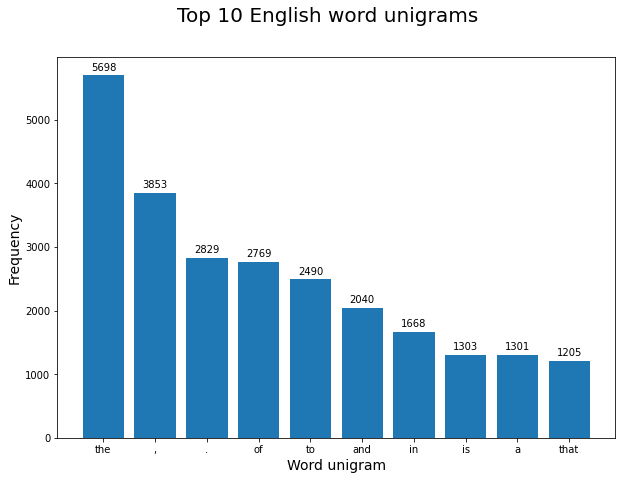

In [ ]:
#Set lables and values as corresponding to top ten most frequent English unigrams
#Arrange indexes by length of labels and set height
labels, values = zip(*english_unigram_freqs[:10])
indexes = arange(len(labels))
width = 0.8 # width = 1 would give bars that overlap because they are too close.

#Size plot, axes and bars
fig = plt.figure(figsize=(10,7))                                                               
ax = fig.gca() # Get current axis
rects = ax.bar(indexes, values, width)

# Add title and axis labels
fig.suptitle('Top 10 English word unigrams', fontsize=20)
plt.xlabel('Word unigram', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display value of each bar on bar
for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 50 + height, '%d' % int(height), ha='center', va='bottom') # Can also add color and fontweight arguments.

# Remove the default x-axis tick numbers and use tick numbers of your own choosing:
ax.set_xticks(indexes)
# Replace the tick numbers with strings:
ax.set_xticklabels(labels)

plt.show()
# plt.savefig('top10EnglishWordUnigrams.png')

Generating unigram and bigram frequencies for English, French and Italian from training files

In [ ]:
# Define function that gets ngram counts from file and returns counts in dictionary format
def get_ngram_count_dict(tokens, n):
    if n == 1:
        n_grams = ngrams(tokens, n)
    else:
        n_grams = ngrams(tokens, n, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_') 
# Fun fact: If I remove padding here and later when testing, and also remove the '_' from the unigram dicts, the accuracy rises slightly. 
# However, it's not statistically significant due to the small size of the data.
    fdist = FreqDist(n_grams)
    ngram_dict = dict()
    for k,v in fdist.items():
        ngram_dict[' '.join(k)] = v
    return ngram_dict

# Calls get_ngram_count_dict to get a unigram and bigram dict from file.
def get_unigram_bigram_dicts(file):
    with open(file, encoding='utf8') as f:
        content = f.read()
    tokens = ultimate_tokenize(content)
    unigram_dict = get_ngram_count_dict(tokens, 1)     
    bigram_dict = get_ngram_count_dict(tokens, 2)     
    return (unigram_dict, bigram_dict)

# Dumps unigram and bigram dictionary of training data of given language to .pickle files.
def dump_pickle(language):
    file = '/content/drive/MyDrive/hm3_files/LangId.train.' + language 
    unigram_dict, bigram_dict = get_unigram_bigram_dicts(file)
    with open('/content/drive/MyDrive/hm3_files/' + language + '.unigram.pickle', 'wb') as handle:
      # HIGHEST_PROTOCOL instructs pickle to use the highest protocol version available.
        pickle.dump(unigram_dict, handle, protocol=pickle.HIGHEST_PROTOCOL) 
    with open('/content/drive/MyDrive/hm3_files/' + language + '.bigram.pickle', 'wb') as handle:
        pickle.dump(bigram_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
dump_pickle('English')
dump_pickle('French')
dump_pickle('Italian')

Later, it will also be required to know how many sentences there are in the training data for each language. This is because of the method used to calculate probabilities (incorporating the probability of the bigram among other bigrams starting with the same word) and the fact we use padding for our bigrams.

In our training data each line is a sentence, which is very convenient for calculating the number of sentences.

We go ahead and get the number of sentences (for more efficiency, the following code could be added to get_unigram_bigram_dicts):

Calculate number of sentences in each file of training data


In [ ]:
with open('/content/drive/MyDrive/hm3_files/LangId.train.English', encoding='utf8') as f:
    for i, l in enumerate(f):
        pass
number_of_sents_en = i + 1
with open('/content/drive/MyDrive/hm3_files/LangId.train.French', encoding='utf8') as f:
    for i, l in enumerate(f):
        pass
number_of_sents_fr = i + 1
with open('/content/drive/MyDrive/hm3_files/LangId.train.Italian', encoding='utf8') as f:
    for i, l in enumerate(f):
        pass
number_of_sents_it = i + 1

print('NUMBER OF SENTENCES IN TRAINING DATA')
print('English:', number_of_sents_en)
print('French:', number_of_sents_fr)
print('Italian:', number_of_sents_it)

NUMBER OF SENTENCES IN TRAINING DATA
English: 2980
French: 2980
Italian: 2821


Identifying language for each line of the test file using bigram probabilities

Unpickle files listing unigrams and bigrams in each test file and load unigrams into dictionary, calculate total size of unigram dictionary


In [ ]:
with open('/content/drive/MyDrive/hm3_files/English.unigram.pickle', 'rb') as handle:
    unigram_english_dict = pickle.load(handle)
    
with open('/content/drive/MyDrive/hm3_files/English.bigram.pickle', 'rb') as handle:
    bigram_english_dict = pickle.load(handle)
    
with open('/content/drive/MyDrive/hm3_files/French.unigram.pickle', 'rb') as handle:
    unigram_french_dict = pickle.load(handle)
    
with open('/content/drive/MyDrive/hm3_files/French.bigram.pickle', 'rb') as handle:
    bigram_french_dict = pickle.load(handle)
    
with open('/content/drive/MyDrive/hm3_files/Italian.unigram.pickle', 'rb') as handle:
    unigram_italian_dict = pickle.load(handle)
    
with open('/content/drive/MyDrive/hm3_files/Italian.bigram.pickle', 'rb') as handle:
    bigram_italian_dict = pickle.load(handle)
    
vocabulary_size = len(unigram_english_dict) + len(unigram_french_dict) + len(unigram_italian_dict)
vocabulary_size

22705

Get probability of given bigram belonging to the language which bigram_dict is in

first_word is the first word of the word bigram.

In [ ]:
def get_bigram_probability(bigram, first_word, bigram_dict, first_word_dict): 
    bigram_count = bigram_dict.get(bigram)
    if bigram_count is None:
        bigram_count = 0
    
    first_word_count = first_word_dict.get(first_word)
    if first_word_count is None:
        first_word_count = 0
    
    return (bigram_count + 1) / (first_word_count + vocabulary_size)

To get the logic of the formula above, note how the proability is used in the function below. Without the + 1 in the Nr, if you find a bigram which is not in our known bigrams for a language, the probability of it being in that language would become 0. 

So we would like to assign a small probability of 1 / vocabulary_size in that case. 

Also note the arbitrariness of this 'probability'. We're saying "Given a bigram and a language, what is the probability that the bigram is of that language?" This is arbitrary because to get a meaningful probability we need to know which are the other languages considered and what their bigram frequencies are. 

That would be another way to do it, but arguably a worse one because it wouldn't be able to give a confidence score for a particular language. The formula just uses common sense to get to a number which works for the purposes. 

In the denominator, we have both first_word_count and vocabulary_size. Why? We have vocabulary_size for all langs in the denom because the larger this is, the less significant it is that for this particular language the bigram appears so many times. 

Could we have used a vocab_size of bigrams instead of unigrams? Sure, and the 'probabilities' would end up being much smaller numbers. 

What about first_word_count? This gives us a way to compare this bigram against other bigrams in this language starting with the same word. 

In general though, for a given bigram, it's more important to consider how many times it exists than to consider whether it is the usual bigram given a certain first word. The formula achieves that. 

Take the bigram 'le monseiur' and the English language. Let's say the bigram appears once and 'le' also appears once, while in French 'le monseiur' appears 100 times and le appears 100,000 times. Probability for English = (1 + 1) / (1 + 20,000) = 0.000099995. Probability for French = (100 + 1) / (100,000 + 20,000) = 0.00084166666. 

Note how the probability for French is still low because 100/100,000 is quite low and maybe it's not French after all if in French le is usually followed by other words. However, it's still significantly higher than the probability for English where both 'le' and 'le monseiur' only appear once.
  

Get probability of given bigram belonging to the language which bigram_dict is in
first_word is the first word of the word bigram.

In [ ]:
def get_bigram_probability(bigram, first_word, bigram_dict, first_word_dict): 
    bigram_count = bigram_dict.get(bigram)
    if bigram_count is None:
        bigram_count = 0
    
    first_word_count = first_word_dict.get(first_word)
    if first_word_count is None:
        first_word_count = 0
    
    return (bigram_count + 1) / (first_word_count + vocabulary_size) 
    # To get the logic of this formula, note how the proability is used in the function below. Without the + 1 in the Nr, if you find a bigram which is not in our known bigrams for a language, the probability of it being in that language would become 0. So we would like to assign a small probability of 1 / vocabulary_size in that case. Also note the arbitrariness of this 'probability'. We're saying "Given a bigram and a language, what is the probability that the bigram is of that language?" This is arbitrary because to get a meaningful probability we need to know which are the other languages considered and what their bigram frequencies are. That would be another way to do it, but arguable a worse one because it wouldn't be able to give a confidence score for a particular language. The formula just uses common sense to get to a number which works for the purposes. In the denominator, we have both first_word_count and vocabulary_size. Why? We have vocabulary_size for all langs in the denom because the larger this is, the less significant it is that for this particular language the bigram appears so many times. Could we have used a vocab_size of bigrams instead of unigrams? Sure, and the 'probabilities' would end up being much smaller numbers. What about first_word_count? This gives us a way to compare this bigram against other bigrams in this language starting with the same word. In general though, for a given bigram, it's more important to consider how many times it exists than to consider whether it is the usual bigram given a certain first word. The formula achieves that. Take the bigram 'le monseiur' and the English language. Let's say the bigram appears once and 'le' also appears once, while in French 'le monseiur' appears 100 times and le appears 100,000 times. Probability for English = (1 + 1) / (1 + 20,000) = 0.000099995. Probability for French = (100 + 1) / (100,000 + 20,000) = 0.00084166666. Note how the probability for French is still low because 100/100,000 is quite low and maybe it's not French after all if in French le is usually followed by other words. However, it's still significantly higher than the probability for English where both 'le' and 'le monseiur' only appear once.

Accuracy: 98.00%


Get probability that a given bigram list is of a language (specified by its bigram_dict)


In [ ]:
def get_language_probability(bigram_list, first_words, bigram_dict, first_word_dict):
    result = 1.0
    index = 0
    for bigram in bigram_list:
        result *= get_bigram_probability(bigram, first_words[index], bigram_dict, first_word_dict)
        index += 1
    return result

Load correct solutions

In [ ]:
solution_dict = dict()
with open('/content/drive/MyDrive/hm3_files/LangId.sol') as f:
    for line in f:
       (key, val) = line.split()
       solution_dict[int(key)] = val
        
line_no = 1
result_dict = dict()
correct = 0
incorrect_line_numbers = []

This needs to be done because I'm using padding for bigrams 
So the unigram dicts in their raw forms can't be used in get_bigram_probability():

In [ ]:
unigram_english_dict['_'] = number_of_sents_en
unigram_french_dict['_'] = number_of_sents_fr
unigram_italian_dict['_'] = number_of_sents_it

In [ ]:
with open('/content/drive/MyDrive/hm3_files/LangId.test', encoding='utf8') as f:
    for line in f:
        tokens = ultimate_tokenize(line)
        bigrams = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_')
        # bigram_list will be exactly like bigrams but instead of [('_', 'this'), ...] it will be ['_ this', ...]. 
        #It is required because this is how bigrams are represented in the dictionary.
        bigram_list = [] 
        # The first words of each bigram. This is the similar to making a unigram_list. 
        #We use it because we don't want something in the form [(this,), ...]. 
        #Also because we want this to include '_'. 
        #We want it to include '_' because we're not using the unigrams for classification but as part of a formula to judge bigram frequency based on the starting word.
        first_words = [] 
        for b in bigrams:
            bigram_list.append(' '.join(b))
            first_words.append(b[0])
        
        english_prob = get_language_probability(bigram_list, first_words, bigram_english_dict, unigram_english_dict)
        french_prob = get_language_probability(bigram_list, first_words, bigram_french_dict, unigram_french_dict)
        italian_prob = get_language_probability(bigram_list, first_words, bigram_italian_dict, unigram_italian_dict)
        
        max_prob = max(english_prob, french_prob, italian_prob)
        if max_prob == english_prob:
            result_dict[line_no] = 'English'
        elif max_prob == french_prob:
            result_dict[line_no] = 'French'
        else:
            result_dict[line_no] = 'Italian'
        
        if solution_dict[line_no] == result_dict[line_no]:
            correct += 1
        else:
            incorrect_line_numbers.append(line_no)
            
        line_no += 1


Storing results from result_dict to file:

In [ ]:
with open('/content/drive/MyDrive/hm3_files/LangId.result', 'w') as f:
    for (key, val) in result_dict.items():
        f.write(' '.join([str(key), val]) + '\n')
        
print('Accuracy: {:2.2f}%'.format(correct * 100 / len(solution_dict)))

In [ ]:
print('Line numbers for incorrectly classified languages: {}'.format(str(incorrect_line_numbers)))

Line numbers for incorrectly classified languages: [24, 87, 187, 191, 247, 279]


Testing with our own sentence

Load string as sentence and tokenize, get word token bigrams, create list for sentence bigrams and first words of bigrams, append bigrams/first words


In [ ]:
sent = "This is a sentence."
sent_tokens = ultimate_tokenize(sent)
sent_bigrams_pre = ngrams(sent_tokens, 2, pad_left=True, pad_right=True, left_pad_symbol='_', right_pad_symbol='_')
sent_bigrams = []
sent_bigrams_first_words = []
for b in sent_bigrams_pre:
    sent_bigrams.append(' '.join(b))
    sent_bigrams_first_words.append(b[0])
print('Sentence bigrams:', sent_bigrams)
print('Sentence bigrams first words:', sent_bigrams_first_words)

Sentence bigrams: ['_ this', 'this is', 'is a', 'a sentence', 'sentence _']
Sentence bigrams first words: ['_', 'this', 'is', 'a', 'sentence']


Calculate probability that sentence belongs to each language based on bigram and first word lists, print probabilites of each


In [ ]:
sent_english_prob = get_language_probability(sent_bigrams, sent_bigrams_first_words, bigram_english_dict, unigram_english_dict)
sent_french_prob = get_language_probability(sent_bigrams, sent_bigrams_first_words, bigram_french_dict, unigram_french_dict)
sent_italian_prob = get_language_probability(sent_bigrams, sent_bigrams_first_words, bigram_italian_dict, unigram_italian_dict)
print("RAW 'PROBABILITIES'")
print('English:', sent_english_prob)
print('French:', sent_french_prob)
print('Italian:', sent_italian_prob)

RAW 'PROBABILITIES'
English: 1.6907852103961136e-18
French: 1.4294173998895933e-22
Italian: 1.4086603160283195e-22


As we can see, these 'probabilities' are arbitrary. We can try to convert them to percentages since we are classifying only among these 3 languages:

Define function to normalize probabilites and use to convert to percentages


In [ ]:
def get_normalized_probabilities(list_of_probabilities):
    sum_of_probabilities = sum(list_of_probabilities)
    result = []
    for probability in list_of_probabilities:
        result.append(probability / sum_of_probabilities)
    return result

probabilities = [sent_english_prob, sent_french_prob, sent_italian_prob]
normalized_probabilities = get_normalized_probabilities(probabilities)

print('RELATIVE PROBABILITIES')
# I use sep because I don't want a space before the % sign.
print('English: ', round(normalized_probabilities[0] * 100, 2), '%', sep='') 
print('French: ', round(normalized_probabilities[1] * 100, 2), '%', sep='')
print('Italian: ', round(normalized_probabilities[2] * 100, 2), '%', sep='')


RELATIVE PROBABILITIES
English: 99.98%
French: 0.01%
Italian: 0.01%


PS: For a state-of-the-art Greek dialect classifier using n-grams, take a look at [Greek Dialect Classifier.](https://github.com/hb20007/greek-dialect-classifier)


##Tutorial 3: Bigram Stemming and Lemmatization

Begin by exploring reuters corpus by retrieving file ids and categories. Reuters is a corpus of news documents. More specifically, reuters is a corpus reader for the Reuters corpus which provides us with methods to access the corpus:

Importing and replace \n with spaces in reuters corpus

In [ ]:
from nltk.corpus import reuters
nltk.download('reuters')

reuters.readme().replace('\n', ' ')

NameError: ignored

Retrieve file ids in reuter's corpus

In [ ]:
reuters.fileids()

Retrieve file id in specific position in reuters corpus

In [ ]:
reuters.fileids()[-1]

'training/9995'

Get length of files ids (number of files) in reuters corpus


In [ ]:
len(reuters.fileids())

10788

Retrieve reuters categories

In [ ]:
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

Retrieve sentences in specific file in reuters corpus

In [ ]:
nltk.download('punkt')
reuters.sents('test/14826')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-', 'JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'U', '.', 'S', '.', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'Asia', "'", 's', 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict', 'far', '-', 'reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'officials', 'said', '.'], ['They', 'told', 'Reuter', 'correspondents', 'in', 'Asian', 'capitals', 'a', 'U', '.', 'S', '.', 'Move', 'against', 'Japan', 'might', 'boost', 'protectionist', 'sentiment', 'in', 'the', 'U', '.', 'S', '.', 'And', 'lead', 'to', 'curbs', 'on', 'American', 'imports', 'of', 'their', 'products', '.'], ...]

Retrieving bigrams from files in Reuters corpus

Load words in files under "trade" category into new variable and get length

In [ ]:
trade_words = reuters.words(categories='trade')
len(trade_words)

142723

Put first 100 trade words in new variable

In [ ]:
trade_words_condensed = trade_words[:100]
trade_words_condensed

['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', ...]

Download and import stopwords from nltk

Remove stopwords from trade_words_condensed and lower case it

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

trade_words_condensed = [w.lower() for w in trade_words_condensed if w.lower() not in stopwords.words('english')]
trade_words_condensed[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['asian',
 'exporters',
 'fear',
 'damage',
 'u',
 '.',
 '.-',
 'japan',
 'rift',
 'mounting']

Remove punctuation

In [ ]:
import string 
# Contains string constants eg. ascii_lowercase which is 'a...z', string formatting functions, other string functions like .capwords() and .translate().

# trade_words_condensed = [w for w in trade_words_condensed if w not in string.punctuation]
punct_combo = [c + "\"" for c in string.punctuation ] + ["\"" + c for c in string.punctuation] + [".-", ":-", "..", "..."]
trade_words_condensed = [w for w in trade_words_condensed if w not in string.punctuation and w not in punct_combo]
trade_words_condensed


['asian',
 'exporters',
 'fear',
 'damage',
 'u',
 'japan',
 'rift',
 'mounting',
 'trade',
 'friction',
 'u',
 'japan',
 'raised',
 'fears',
 'among',
 'many',
 'asia',
 'exporting',
 'nations',
 'row',
 'could',
 'inflict',
 'far',
 'reaching',
 'economic',
 'damage',
 'businessmen',
 'officials',
 'said',
 'told',
 'reuter',
 'correspondents',
 'asian',
 'capitals',
 'u',
 'move',
 'japan',
 'might',
 'boost',
 'protectionist',
 'sentiment',
 'u',
 'lead',
 'curbs',
 'american',
 'imports',
 'products',
 'exporters',
 'said',
 'conflict',
 'would',
 'hurt',
 'long']

Get bigrams for words in cleaned trade word list

In [ ]:
from nltk import bigrams

bi_trade_words_condensed = list(bigrams(trade_words_condensed))
bi_trade_words_condensed[:5]

[('asian', 'exporters'),
 ('exporters', 'fear'),
 ('fear', 'damage'),
 ('damage', 'u'),
 ('u', 'japan')]

Create frequency distribution for bigrams in trade word list

Print frequency of each word bigram

In [ ]:
from nltk import FreqDist

bi_fdist = FreqDist(bi_trade_words_condensed)

for word, frequency in bi_fdist.most_common(3):
    print(word, frequency)

('u', 'japan') 2
('asian', 'exporters') 1
('exporters', 'fear') 1


Plot frequency distribution of word bigrams

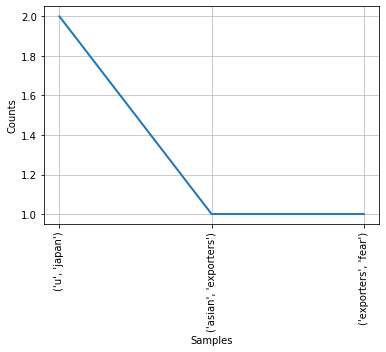

In [ ]:
bi_fdist.plot(3, cumulative=False)

***Stemming:*** Reducing inflected words to their stem, based on root form 

Load each stemmer as variable and specify language

Test how each imported stemmer stems sample text

In [ ]:
from nltk.stem import (PorterStemmer, LancasterStemmer)
from nltk.stem.snowball import SnowballStemmer # This is "Porter 2" and is considered the optimal stemmer.

porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer("english")

print(porter.stem('Re-testing'), lancaster.stem('Re-testing'), snowball.stem('Re-testing'))

re-test re-testing re-test


Fun fact: SnowballStemmer can stem several other languages beside English.

To make, for instance, a French stemmer, we can do the following: french_stemmer = SnowballStemmer('french')

In [ ]:
SnowballStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

This is an alternative that creates a dictionary mapping of every character from string.punctuation to None (this will also work but creates a whole dictionary so is slower)

This uses the 3-argument version of str.maketrans with arguments (x, y, z) where 'x' and 'y' must be equal-length strings and characters in 'x' are replaced by characters in 'y'. 'z' is a string (string.punctuation here) where each character in the string is mapped to None

In [ ]:
#translator = str.maketrans(dict.fromkeys(string.punctuation)
from nltk import word_tokenize

sentence = "So, we'll go no more a-roving. So late into the night, Though the heart be still as loving, And the moon be still as bright."

translator = str.maketrans('', '', string.punctuation)
translator

{33: None,
 34: None,
 35: None,
 36: None,
 37: None,
 38: None,
 39: None,
 40: None,
 41: None,
 42: None,
 43: None,
 44: None,
 45: None,
 46: None,
 47: None,
 58: None,
 59: None,
 60: None,
 61: None,
 62: None,
 63: None,
 64: None,
 91: None,
 92: None,
 93: None,
 94: None,
 95: None,
 96: None,
 123: None,
 124: None,
 125: None,
 126: None}

In [ ]:
tokens = word_tokenize(sentence.translate(translator))
tokens[:3]

['So', 'well', 'go']

In [ ]:
for stemmer in [porter, lancaster, snowball]:
    print([stemmer.stem(t) for t in tokens])

['So', 'well', 'go', 'no', 'more', 'arov', 'So', 'late', 'into', 'the', 'night', 'though', 'the', 'heart', 'be', 'still', 'as', 'love', 'and', 'the', 'moon', 'be', 'still', 'as', 'bright']
['so', 'wel', 'go', 'no', 'mor', 'arov', 'so', 'lat', 'into', 'the', 'night', 'though', 'the', 'heart', 'be', 'stil', 'as', 'lov', 'and', 'the', 'moon', 'be', 'stil', 'as', 'bright']
['so', 'well', 'go', 'no', 'more', 'arov', 'so', 'late', 'into', 'the', 'night', 'though', 'the', 'heart', 'be', 'still', 'as', 'love', 'and', 'the', 'moon', 'be', 'still', 'as', 'bright']


***Lemmatization:*** Aims to achieve a similar base "stem" for a word, but aims to derive the genuine dictionary root word, not just a truncated version of the word.

The default lemmatization method with the Python NLTK is the WordNet lemmatizer.


In [ ]:
nltk.download('wordnet')
from nltk import WordNetLemmatizer

wnl = WordNetLemmatizer()

print(wnl.lemmatize('brightening'), wnl.lemmatize('boxes'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
brightening box


As we saw above, sometimes, if we try to lemmatize a word, it will end up with the same word. This is because the default part of speech is nouns.


In [ ]:
wnl.lemmatize('brightening', pos='v')

'brighten'

##Tutorial 4: Finding Unusual Words in a Given Language

Create string, import tokenizer, and tokenize and lowercase string

In [ ]:
text = "Truly Kryptic is the best puzzle game. It's browser-based and free. Google it."

from nltk import word_tokenize
import nltk
nltk.download('punkt')

text_tokenized = word_tokenize(text.lower())
text_tokenized

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['truly',
 'kryptic',
 'is',
 'the',
 'best',
 'puzzle',
 'game',
 '.',
 'it',
 "'s",
 'browser-based',
 'and',
 'free',
 '.',
 'google',
 'it',
 '.']

Import and explore the words corpus

In [ ]:
nltk.download('words')
from nltk.corpus import words
words.readme().replace('\n', ' ')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


'Wordlists  en: English, http://en.wikipedia.org/wiki/Words_(Unix) en-basic: 850 English words: C.K. Ogden in The ABC of Basic English (1932) '

List path name of words corpus

In [ ]:
words

<WordListCorpusReader in '/root/nltk_data/corpora/words'>

Get file ids in words corpus

In [ ]:
words.fileids()

['en', 'en-basic']

Get first ten words in en corpus

In [ ]:
words.words('en')[:10]

['A',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'Aani',
 'aardvark',
 'aardwolf',
 'Aaron']

Get first 10 words in en-basic corpus

In [ ]:
words.words('en-basic')[:10]

['I',
 'a',
 'able',
 'about',
 'account',
 'acid',
 'across',
 'act',
 'addition',
 'adjustment']

Get length of words in en corpus

In [ ]:
len(words.words('en'))

235886

Get length of words in en-basic corpus

In [ ]:
len(words.words('en-basic'))

850

Find unusual words in given language

In [ ]:
english_vocab = set(w.lower() for w in words.words())
text_vocab = set(w.lower() for w in text_tokenized if w.isalpha()) # Note .isalpha() removes punctuation tokens. However, tokens with a hyphen like 'browser-based' are totally skipped over because .isalpha() would be false.
unusual = text_vocab.difference(english_vocab)
unusual

{'google'}

##Tutorial 5: Part of Speech Taggers and Named Entity Recognition

***Creating a POS Tagger:*** Create a tagger that will identify parts of speech in a given sentence. 

Train a classifier to work out which suffixes are most informative for POS tagging. 

We can begin by finding out what the most common suffixes are

Import brown corpus and frequency distribution module

In [ ]:
import nltk
nltk.download('brown')
from nltk.corpus import brown
from nltk import FreqDist

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


Determine most frequent suffixes in brown corpus (frequency of last 1, 2, 3 characters in words in brown corpus)


In [ ]:
suffix_fdist = FreqDist()
for word in brown.words():
    word = word.lower()
    suffix_fdist[word[-1:]] += 1
    suffix_fdist[word[-2:]] += 1
    suffix_fdist[word[-3:]] += 1
    
#suffix_fdist

Put 100 most common suffixes into list and print the top 10


In [ ]:
common_suffixes = [suffix for (suffix, count) in suffix_fdist.most_common(100)]
common_suffixes[:10]

['e', ',', '.', 's', 'd', 't', 'he', 'n', 'a', 'of']

Next, we'll define a feature extractor function which checks a given word for these suffixes:

In [ ]:
def pos_features(word):
    features = {}
    for suffix in common_suffixes:
        features['endswith({})'.format(suffix)] = word.lower().endswith(suffix)
    return features

#pos_features('test')

Now that we've defined our feature extractor, we can use it to train a new decision tree classifier:

In [ ]:
tagged_words = brown.tagged_words(categories='news')
featuresets = [(pos_features(n), g) for (n,g) in tagged_words]
#featuresets[0]

Import decision tree classifier and accuracy

In [ ]:
from nltk import DecisionTreeClassifier
from nltk.classify import accuracy

Set cutoff limit for classifier and training and test set variables

In [ ]:
cutoff = int(len(featuresets) * 0.1)
train_set, test_set = featuresets[cutoff:], featuresets[:cutoff]

Run classifer on training set

NLTK is a teaching toolkit which is not really optimized for speed.

Therefore, this may take forever. For speed, use scikit-learn for the classifiers.

In [ ]:
classifier = DecisionTreeClassifier.train(train_set) 

In [ ]:
##from sklearn.tree import DecisionTreeClassifier

In [ ]:
accuracy(classifier, test_set)

In [ ]:
classifier.classify(pos_features('cats'))

In [ ]:
classifier.pseudocode(depth=4)

To improve the classifier, we can add contextual features:

def pos_features(sentence, i): [1]
    features = {"suffix(1)": sentence[i][-1:],
                "suffix(2)": sentence[i][-2:],
                "suffix(3)": sentence[i][-3:]}
    if i == 0:
        features["prev-word"] = "<START>"
    else:
        features["prev-word"] = sentence[i-1]
    return features
Then, instead of working with tagged words, we work with tagged sentences:

tagged_sents = brown.tagged_sents(categories='news')
We can then improve this further by adding more features such as prev-tag etc.

***Parts of Speech and Meaning (English Only)***

Create string, import word tokenizer, tokenize words in t and print tokens in second sentence

In [ ]:
t = "Cyprus, officially the Republic of Cyprus, is an island country in the Eastern Mediterranean and the third largest and third most populous island in the Mediterranean. Cyprus is located south of Turkey, west of Syria and Lebanon, northwest of Israel, north of Egypt, and southeast of Greece. Cyprus is a major tourist destination in the Mediterranean. With an advanced, high-income economy and a very high Human Development Index, the Republic of Cyprus has been a member of the Commonwealth since 1961 and was a founding member of the Non-Aligned Movement until it joined the European Union on 1 May 2004. On 1 January 2008, the Republic of Cyprus joined the eurozone."

nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize
sentences = sent_tokenize(t.lower())
sentences

tokens = word_tokenize(sentences[2])
tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['cyprus',
 'is',
 'a',
 'major',
 'tourist',
 'destination',
 'in',
 'the',
 'mediterranean',
 '.']

Import part of speech tagger from nltk and tag tokens in string t 

In [ ]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
tags = pos_tag(tokens)
tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('cyprus', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('major', 'JJ'),
 ('tourist', 'NN'),
 ('destination', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mediterranean', 'NN'),
 ('.', '.')]

Access documentation for tags, for example for NN:

In [ ]:
import nltk.help
nltk.download('tagsets')
nltk.help.upenn_tagset('NN')

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


***Word senses for homonyms***

WordNet is a lexical database for the English language in the form of a semantic graph.

WordNet groups English words into sets of synonyms called synsets, provides short definitions and usage examples, and records a number of relations among these synonym sets or their members.

NLTK provides an interface to the WordNet API.

Download wordnet and list set of synonyms (synset) for "human"

In [ ]:
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
wn.synsets('human')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


[Synset('homo.n.02'),
 Synset('human.a.01'),
 Synset('human.a.02'),
 Synset('human.a.03')]

Get first definition human from synset

In [ ]:
wn.synsets('human')[0].definition()

'any living or extinct member of the family Hominidae characterized by superior intelligence, articulate speech, and erect carriage'

Get second definition human from synset

In [ ]:
wn.synsets('human')[1].definition()

'characteristic of humanity'

Define variable "human" as "human" in synset

In [ ]:
human = wn.synsets('Human', pos=wn.NOUN)[0]
human

Synset('homo.n.02')

A hypernym is a word with a broad meaning constituting a category into which words with more specific meanings fall a superordinate. 


In [ ]:
# For example, colour is a hypernym of red.
human.hypernyms() 

[Synset('hominid.n.01')]

In [ ]:
human.hyponyms()

[Synset('homo_erectus.n.01'),
 Synset('homo_habilis.n.01'),
 Synset('homo_sapiens.n.01'),
 Synset('homo_soloensis.n.01'),
 Synset('neandertal_man.n.01'),
 Synset('rhodesian_man.n.01'),
 Synset('world.n.08')]

In [ ]:
bike = wn.synsets('bicycle')[0]
bike

Synset('bicycle.n.01')

In [ ]:
girl = wn.synsets('girl')[1]
girl

Synset('female_child.n.01')

The Wu-Palmer metric (WUP) is a measure of similarity based on distance in the graph. There are many other metrics too.

Get similarity between bike and human

In [ ]:
bike.wup_similarity(human) 

0.34782608695652173

Get similarity between girl and human

In [ ]:
girl.wup_similarity(human)

0.5217391304347826

Get synonyms for 'girl'

In [ ]:
synonyms = []
for syn in wn.synsets('girl'):
    # A lemma is basically the dictionary form or base form of a word, as opposed to the various inflected forms of a word. 
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())
synonyms

['girl',
 'miss',
 'missy',
 'young_lady',
 'young_woman',
 'fille',
 'female_child',
 'girl',
 'little_girl',
 'daughter',
 'girl',
 'girlfriend',
 'girl',
 'lady_friend',
 'girl']

Get antonyms for 'girl'

In [ ]:
antonyms = []
for syn in wn.synsets("girl"):
    for l in syn.lemmas():
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())
antonyms

['male_child', 'boy', 'son', 'boy']

***Chunking and Entity Recognition:***

**Chunking:** Divide a sentence into chunks. Usually each chunk contains a head and (optionally) additional words and modifiers. Examples of chunks include noun groups and verb groups.



In [ ]:
from nltk.chunk import RegexpParser

In order to create a chunker, we need to first define a chunk grammar, consisting of rules that indicate how sentences should be chunked.

We can define a simple grammar for a noun phrase (NP) chunker with a single regular-expression rule. This rule says that an NP chunk should be formed whenever the chunker finds an optional determiner (DT) followed by any number of adjectives (JJ) and then a noun (NN).

Note how grammatical structures which are not noun phrases are not chunked, which is totally fine:

In [ ]:
grammar = "NP: {<DT>?<JJ>*<NN>}"
import matplotlib
matplotlib.use('Agg')

In [ ]:
###DOES NOT WORK: no display name and no $DISPLAY environment variable

chunker = RegexpParser(grammar)
result = chunker.parse(tags)
result

TclError: ignored

Tree('S', [Tree('NP', [('cyprus', 'NN')]), ('is', 'VBZ'), Tree('NP', [('a', 'DT'), ('major', 'JJ'), ('tourist', 'NN')]), Tree('NP', [('destination', 'NN')]), ('in', 'IN'), Tree('NP', [('the', 'DT'), ('mediterranean', 'NN')]), ('.', '.')])

***Entity Recognition:*** The goal of entity recogintion is to detect entities such as Person, Location, Time, etc.

In [ ]:
###DOES NOT WORK: no display name and no $DISPLAY environment variable
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.chunk import ne_chunk # ne = named entity
ne_chunk(tags)

Note ne_chunk was unable to detect any entities in our sentence. That is because it is quite limited, being able to recognize only the following entities:

FACILITY, GPE (Geo-Political Entity), GSP (Geo-Socio-Political group), LOCATION, ORGANIZATION, PERSON

## Tutorial 6: Name Gender Identifier

***Building a feature extractor***

An idea is to use the last letter of the name to predict the gender. For instance, names ending in a, e and i are likely to be female, while names ending in k, o, r, s and t are likely to be male.

Feature extractor which returns the last letter of a word

In [ ]:
def gender_features(word):
    return {'last_letter': word[-1]}

gender_features('John')

{'last_letter': 'n'}

The returned dictionary is known as a feature set.

Import and open the names corpus

In [ ]:
import nltk
nltk.download('names')
from nltk.corpus import names

names.readme().replace('\n', ' ')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


'Names Corpus, Version 1.3 (1994-03-29) Copyright (C) 1991 Mark Kantrowitz Additions by Bill Ross  This corpus contains 5001 female names and 2943 male names, sorted alphabetically, one per line.  You may use the lists of names for any purpose, so long as credit is given in any published work. You may also redistribute the list if you provide the recipients with a copy of this README file. The lists are not in the public domain (I retain the copyright on the lists) but are freely redistributable.  If you have any additions to the lists of names, I would appreciate receiving them.  Mark Kantrowitz <mkant+@cs.cmu.edu> http://www-2.cs.cmu.edu/afs/cs/project/ai-repository/ai/areas/nlp/corpora/names/'

Get the file ids in the names corpus

In [ ]:
names.fileids()

['female.txt', 'male.txt']

Get the first five words in the female text file in corpus

In [ ]:
names.words('female.txt')[:5]

['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi']

To build the classifier, we need to prepare a list of examples and corresponding class labels.

Create list of labeled names where names in female.tx file are labeled female and male.txt names labeled male, print first five in labeled names list

In [ ]:
labeled_names = ([(name, 'female') for name in names.words('female.txt')] + [(name, 'male') for name in names.words('male.txt')])
labeled_names[:5]

[('Abagael', 'female'),
 ('Abagail', 'female'),
 ('Abbe', 'female'),
 ('Abbey', 'female'),
 ('Abbi', 'female')]

We shuffle the data so that we can split it by index into training and test data.


In [ ]:
import random
random.shuffle(labeled_names) 
labeled_names[:5]

[('Norbert', 'male'),
 ('Stoddard', 'female'),
 ('Silvan', 'male'),
 ('Joete', 'female'),
 ('Nance', 'female')]

Create list of the last letter of each name in labeled names and corresponding gender, print first five


In [ ]:
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
featuresets[:5]

7944

print length of feature sets

In [ ]:
len(featuresets)

7944

We split the data into a training (80%) and test (20%) set:


In [ ]:
from nltk import NaiveBayesClassifier

TRAIN_SET_SIZE = round(len(featuresets) * .8)
train_set, test_set = featuresets[:TRAIN_SET_SIZE], featuresets[TRAIN_SET_SIZE:]

We also get the names in the test set, to be used later:

In [ ]:
test_names = labeled_names[TRAIN_SET_SIZE:]

Define classifier

In [ ]:
classifier = NaiveBayesClassifier.train(train_set)


 When working with large corpora, constructing a single list that contains the features of every instance can use up a large amount of memory. 
 
In these cases, use the function nltk.classify.apply_features, which returns an object that acts like a list but does not store all the feature sets in memory: 

from nltk.classify import apply_features

train_names, test_names = labeled_names[:round(len(featuresets) * .8)], labeled_names[round(len(featuresets) * .8):]

train_set = apply_features(gender_features, labeled_names[500:])

test_set = apply_features(gender_features, labeled_names[:500])

Prints likelihood ratios for most informative features

In [ ]:
classifier.show_most_informative_features(10) 

Most Informative Features
             last_letter = 'a'            female : male   =     31.8 : 1.0
             last_letter = 'k'              male : female =     27.6 : 1.0
             last_letter = 'v'              male : female =     10.4 : 1.0
             last_letter = 'p'              male : female =      9.7 : 1.0
             last_letter = 'd'              male : female =      8.8 : 1.0
             last_letter = 'o'              male : female =      8.6 : 1.0
             last_letter = 'm'              male : female =      7.6 : 1.0
             last_letter = 'r'              male : female =      6.9 : 1.0
             last_letter = 'g'              male : female =      4.9 : 1.0
             last_letter = 'z'              male : female =      4.6 : 1.0


Testing the classifer:

Get labels from classifer

In [ ]:
classifier.labels()

['male', 'female']

Get accuracy of classifer

In [ ]:
from nltk.classify import accuracy

round(accuracy(classifier, test_set), 2)

0.76

Test classifier on female name based on last letter of name

In [ ]:
classifier.classify(gender_features('Aphrodite'))

'female'

Test classifier on male name based on last letter of name

In [ ]:
classifier.classify(gender_features('Zeus'))

'male'

Building a classifier with more features:

Define a classifier which lowercases first and last letter of word and identifies which letters are contained in word and at what frequency

In [ ]:
def gender_features2(name):
    features = {}
    features["first_letter"] = name[0].lower()
    features["last_letter"] = name[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count({})".format(letter)] = name.lower().count(letter)
        features["has({})".format(letter)] = (letter in name.lower())
    return features

#gender_features2('John')

Get features above for list of gendered names and put in list, print first item in list


In [ ]:
featuresets2 = [(gender_features2(n), gender) for (n, gender) in labeled_names]
#featuresets2[0]

Train new classifier on same set of male and female names above and get accuracy


In [ ]:
train_set2, test_set2 = featuresets2[:TRAIN_SET_SIZE], featuresets2[TRAIN_SET_SIZE:]
classifier2 = NaiveBayesClassifier.train(train_set2)
round(accuracy(classifier2, test_set2), 2)

0.79

We would have expected that having too many specific features on a small dataset would lead to overfitting, but it seems the classifier was good at avoiding that since its performance is slightly better.



Show the most informative features for the new classifer


In [ ]:
classifier2.show_most_informative_features(15)

Most Informative Features
             last_letter = 'a'            female : male   =     31.8 : 1.0
             last_letter = 'k'              male : female =     27.6 : 1.0
             last_letter = 'v'              male : female =     10.4 : 1.0
             last_letter = 'p'              male : female =      9.7 : 1.0
                count(v) = 2              female : male   =      8.9 : 1.0
             last_letter = 'd'              male : female =      8.8 : 1.0
             last_letter = 'o'              male : female =      8.6 : 1.0
             last_letter = 'm'              male : female =      7.6 : 1.0
             last_letter = 'r'              male : female =      6.9 : 1.0
            first_letter = 'w'              male : female =      4.9 : 1.0
             last_letter = 'g'              male : female =      4.9 : 1.0
             last_letter = 'z'              male : female =      4.6 : 1.0
             last_letter = 'b'              male : female =      4.4 : 1.0

Indeed, it seems the classifier is mainly using the last letter, along with some other features that happen to improve the accuracy.

***Comparing the two classifiers using nltk.metrics***

Before we start, here's a useful function for comparing strings:

Edit distance is the number of characters that need to be substituted, inserted, or deleted, to transform s1 into s2.


In [ ]:
from nltk.metrics import edit_distance

edit_distance("John", "Joan")

1

The NLTK metrics module provides functions for calculating metrics beyond mere accuracy. But in order to do so, we need to build 2 sets for each classification label: a reference set of correct values, and a test set of observed values.

In [ ]:
import collections

# Classifier 1
refsets = collections.defaultdict(set) # For what this is: https://stackoverflow.com/questions/5900578/how-does-collections-defaultdict-work
testsets = collections.defaultdict(set)

for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)
    
# Classifier 2
refsets2 = collections.defaultdict(set)
testsets2 = collections.defaultdict(set)

for i, (feats, label) in enumerate(test_set2):
    refsets2[label].add(i)
    observed = classifier2.classify(feats)
    testsets2[observed].add(i)

In [ ]:
refsets

In [ ]:
testsets

We can proceed to print the metrics for each classifier. 

However, we cannot get the accuracy in this manner because nltk.metrics.scores.accuracy(reference, test) works by comparing test[i] == reference[i] and our reference and test are not formatted in a way that allows for this.

It's the same for the confusion matrix.

In [ ]:
from nltk.metrics.scores import (precision, recall, f_measure)

args = (
    round(precision(refsets['female'], testsets['female']), 2),
    round(precision(refsets['male'], testsets['male']), 2),
    round(recall(refsets['female'], testsets['female']), 2),
    round(recall(refsets['male'], testsets['male']), 2),
    round(f_measure(refsets['female'], testsets['female']), 2),
    round(f_measure(refsets['male'], testsets['male']), 2)
)

args2 = (
    round(precision(refsets2['female'], testsets2['female']), 2),
    round(precision(refsets2['male'], testsets2['male']), 2),
    round(recall(refsets2['female'], testsets2['female']), 2),
    round(recall(refsets2['male'], testsets2['male']), 2),
    round(f_measure(refsets2['female'], testsets2['female']), 2),
    round(f_measure(refsets2['male'], testsets2['male']), 2)
)

print('''
CLASSIFIER 1
------------ 
Female precision: {0}
Male precision: {1}
Female recall: {2}
Male recall: {3}
Female F1 score: {4}
Male F1 score: {5}

CLASSIFIER 2
------------ 
Female precision: {6}
Male precision: {7}
Female recall: {8}
Male recall: {9}
Female F1 score: {10}
Male F1 score: {11}
'''.format(*args, *args2))


CLASSIFIER 1
------------ 
Female precision: 0.81
Male precision: 0.67
Female recall: 0.82
Male recall: 0.66
Female F1 score: 0.81
Male F1 score: 0.67

CLASSIFIER 2
------------ 
Female precision: 0.83
Male precision: 0.72
Female recall: 0.85
Male recall: 0.68
Female F1 score: 0.84
Male F1 score: 0.7



***Error analysis:*** Investigating errors of classifier (names whose gender was misclassified)

Make list for errors and load in classifications where guess does not equal gender tag, print first five


In [ ]:
errors = []
for (name, tag) in test_names:
    guess = classifier2.classify(gender_features(name))
    if guess != tag:
        errors.append((tag, guess, name))

errors[:5]

[('female', 'male', 'Christean'),
 ('female', 'male', 'Charis'),
 ('male', 'female', 'Cody'),
 ('male', 'female', 'Micah'),
 ('male', 'female', 'Tracie')]

Print three columns (correct gender of name, guessed gender, and name itself)

In [ ]:
for (tag, guess, name) in sorted(errors):
    #print('Correct = {:8} guess = {:8} name = {}'.format(tag, guess, name)) # :8 creates spaces between columns.

Looking through this list of errors, it seems that some suffixes that are more than one letter long can be indicative of name genders. For example, names ending in yn appear to be predominantly female, despite the fact that names ending in n tend to be male; and names ending in ch are usually male, even though names that end in h tend to be female.

Building a classifier with even more features in response to errors

Define new classifier which counts first letter and last two letters of word

In [ ]:
def gender_features3(name):
    features = {}
    features["first_letter"] = name[0].lower()
    features["suffix1"] = name[-1].lower()
    features["suffix2"] = name[-2:].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count({})".format(letter)] = name.lower().count(letter)
        features["has({})".format(letter)] = (letter in name.lower())
    return features

#gender_features3('John')

Get features above for list of gendered names and put in list, print first item in list


In [ ]:
featuresets3 = [(gender_features3(n), gender) for (n, gender) in labeled_names]
featuresets3[0]

Train new classifier on same set of male and female names above and get accuracy


In [ ]:
train_set3, test_set3 = featuresets3[:TRAIN_SET_SIZE], featuresets3[TRAIN_SET_SIZE:]
classifier3 = NaiveBayesClassifier.train(train_set3)
round(accuracy(classifier3, test_set3), 2)

0.8

Get 15 most informative features for classifier3

In [ ]:
classifier3.show_most_informative_features(15)

Most Informative Features
                 suffix2 = 'na'           female : male   =     84.0 : 1.0
                 suffix2 = 'la'           female : male   =     67.8 : 1.0
                 suffix2 = 'ra'           female : male   =     53.7 : 1.0
                 suffix2 = 'ia'           female : male   =     49.4 : 1.0
                 suffix2 = 'us'             male : female =     33.3 : 1.0
                 suffix1 = 'a'            female : male   =     31.8 : 1.0
                 suffix2 = 'rd'             male : female =     29.9 : 1.0
                 suffix1 = 'k'              male : female =     27.6 : 1.0
                 suffix2 = 'sa'           female : male   =     27.3 : 1.0
                 suffix2 = 'ta'           female : male   =     21.9 : 1.0
                 suffix2 = 'do'             male : female =     21.4 : 1.0
                 suffix2 = 'ld'             male : female =     20.7 : 1.0
                 suffix2 = 'rt'             male : female =     16.7 : 1.0

***Maximum entropy classifier:*** The principle of maximum entropy states that the probability distribution which best represents the current state of knowledge is the one with largest entropy.

The principle of maximum entropy is invoked when we have some piece(s) of information about a probability distribution, but not enough to characterize it completely—likely because we do not have the means or resources to do so. As an example, if all we know about a distribution is its average, we can imagine infinite shapes that yield a particular average. The principle of maximum entropy says that we should humbly choose the distribution that maximizes the amount of unpredictability contained in the distribution.

Taking the idea to the extreme, it wouldn’t be scientific to choose a distribution that simply yields the average value 100% of the time.

From all the models that fit our training data, the Maximum Entropy classifier selects the one which has the largest entropy. Due to the minimum assumptions that the Maximum Entropy classifier makes, it is usually used when we don’t know anything about the prior distributions and when it is unsafe to make any assumptions. Also, the maximum entropy classifier is used when we can’t assume the conditional independence of the features.

In this example, the performance in terms of accuracy on the test set starts significantly improving beyond the previous model's at around 25 iterations.


In [ ]:
from nltk import MaxentClassifier

# max_iter has default value 100. 
me_classifier = MaxentClassifier.train(train_set3, max_iter=25) 

  ==> Training (25 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.373
             2          -0.60435        0.627
             3          -0.58273        0.627
             4          -0.56287        0.633
             5          -0.54470        0.668
             6          -0.52810        0.703
             7          -0.51296        0.730
             8          -0.49913        0.752
             9          -0.48651        0.767
            10          -0.47497        0.779
            11          -0.46440        0.787
            12          -0.45471        0.792
            13          -0.44580        0.795
            14          -0.43760        0.795
            15          -0.43004        0.798
            16          -0.42304        0.799
            17          -0.41656        0.801
            18          -0.41055        0.802
            19          -0.40495        0.805
  

Get the accuracy of the me classifier. The accuracies above were on the training set so this is what matters.


In [ ]:
round(accuracy(me_classifier, test_set3), 2) 

0.81

Get 10 most informative features for me classifier


In [ ]:
me_classifier.show_most_informative_features(10)

  -1.938 suffix2=='na' and label is 'male'
  -1.922 suffix2=='la' and label is 'male'
  -1.886 suffix2=='ra' and label is 'male'
  -1.658 suffix2=='ia' and label is 'male'
  -1.430 suffix2=='sa' and label is 'male'
  -1.387 suffix1=='a' and label is 'male'
  -1.346 suffix2=='us' and label is 'female'
  -1.277 suffix1=='k' and label is 'female'
  -1.217 suffix2=='ta' and label is 'male'
  -1.213 suffix2=='rd' and label is 'female'


### ***More Classifiers:***
Scikit-learn (sklearn) is a popular library which features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN.

NLTK provides an API to quickly use sklearn classifiers in nltk.classify.scikitlearn. The other option is to import and use sklearn directly.

For an example of integrating sklearn with NLTK, you can check out [this notebook on Kaggle.](https://www.kaggle.com/alvations/basic-nlp-with-nltk) Kaggle is a great website for NLP and machine learning in general, creating an account is highly recommended.

## Tutorial 7: Classifying News Documents into Categories

Based on Another Excercise: Classifying News Documents in Categories: sport, humor, adventure, science fiction, etc... in [Natural Language Processing with Python/NLTK by Luciano M. Guasco](https://github.com/luchux/ipython-notebook-nltk/blob/master/NLP%20-%20MelbDjango.ipynb)

**Exploring the Brown corpus**

The Corpus consists of 500 samples, distributed across 15 genres. Each sample began at a random sentence-boundary in the article or other unit chosen, and continued up to the first sentence boundary after 2,000 words.

A. PRESS: Reportage (44 texts)

B. PRESS: Editorial (27 texts)

C. PRESS: Reviews (17 texts)

D. RELIGION (17 texts)

E. SKILL AND HOBBIES (36 texts)

F. POPULAR LORE (48 texts)

G. BELLES-LETTRES - Biography, Memoirs, etc. (75 texts)

H. MISCELLANEOUS: US Government & House Organs (30 texts)

J. LEARNED - Natural sciences, Medicine, Mathematics, etc. (80 texts)

K. FICTION: General (29 texts)

L. FICTION: Mystery and Detective Fiction (24 texts)

M. FICTION: Science (6 texts)

N. FICTION: Adventure and Western (29 texts)

P. FICTION: Romance and Love Story (29 texts)

R. HUMOR (9 texts)

Download brown corpus and clean spacing

In [ ]:
import nltk
nltk.download('brown')

from nltk.corpus import brown

brown.readme().replace('\n', ' ')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


'BROWN CORPUS  A Standard Corpus of Present-Day Edited American English, for use with Digital Computers.  by W. N. Francis and H. Kucera (1964) Department of Linguistics, Brown University Providence, Rhode Island, USA  Revised 1971, Revised and Amplified 1979  http://www.hit.uib.no/icame/brown/bcm.html  Distributed with the permission of the copyright holder, redistribution permitted. '

Print file ids in Brown corpus

In [ ]:
brown.fileids()

Get categories (genres of text) in Brown corpus

In [ ]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

Print first sentence in specified file of brown corpus

In [ ]:
brown.sents('ca01')[0]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of',
 "Atlanta's",
 'recent',
 'primary',
 'election',
 'produced',
 '``',
 'no',
 'evidence',
 "''",
 'that',
 'any',
 'irregularities',
 'took',
 'place',
 '.']

Compile a list of most popular words in the corpus

Takes a bunch of tokens and returns the frequencies of all unique cases.

In [ ]:
from nltk import FreqDist 
# Check if the word is alphabetical avoids including stuff like `` and '' which are actually pretty common. 
# Note that it also omits words such as 1 (very common), aug., 1913, $30, 13th, over-all etc. Another option would have been .isalnum().
words_in_corpora = FreqDist(w.lower() for w in brown.words() if w.isalpha()) 
#words_in_corpora

Use this instead of sorted() to sort dictionary into a (mutable) list in order to delete the second column as opposed to into a tuple (immutable).


In [ ]:
words_in_corpora_freq_sorted = list(map(list, words_in_corpora.items()))
#words_in_corpora_freq_sorted

Sort words in corpus based on frequency

In [ ]:
words_in_corpora_freq_sorted.sort(key=lambda x: x[1], reverse=True) # Using a lambda function is an alternative to using the operator library.
words_in_corpora_freq_sorted

Put 1500 most frequent words in list into variable and delete word count (list item 1)


In [ ]:
best1500 = words_in_corpora_freq_sorted[:1500]

for list_item in best1500:
    del list_item[1]

#best1500

Since best1500 is now a list of words, it should be flattened. 

Break down the list into its individual sublists and then chain them. 

Chain further breaks down each sublist into its individual components so this approach can be used to flatten any list of lists.

In [ ]:
import itertools

chain = itertools.chain(*best1500) 
best1500 = list(chain) # chain is of type itertools.chain so we need the cast
#best1500

Receives a list of words and removes stop words from list

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopw = stopwords.words('english')

def nonstop(listwords):
    return [word for word in listwords if word not in stopw]

best1500_words_corpora = nonstop(best1500) # Note how this will probably contain less than 1500 words.
#best1500_words_corpora

***Converting corpus to form suitable for classification:*** Each file in the corpus will eventually be represented by a dictionary showing the presence of the corpus’ most popular words in the particular file.

In [ ]:
# documents = [(nonstop(brown.words(fileid)), category) for category in brown.categories() for fileid in brown.fileids(category)]
# documents # Note how documents is a list of tuples.

# The code above generates a representation of the corpus but without removing punctuation. This is better:
documents = [([item.lower() for item in nonstop(brown.words(fileid)) if item.isalpha()], category)
             for category in brown.categories()
             for fileid in brown.fileids(category)]
documents # Note how documents is a list of tuples.

Shuffle items in list of tuples

In [ ]:
from random import shuffle

shuffle(documents)
documents

Given a document extract features (the presence or not of the 1500 most frequent words of the corpus)

In [ ]:
def document_features(doc):
    doc_set_words = set(doc) # Checking whether a word occurs in a set is much faster than checking whether it occurs in a list.
    features_dic = {} # Features is a dictionary
    for word in best1500_words_corpora:
        features_dic['has(%s)' % word] = (word in doc_set_words)
    return features_dic

doc_features_set = [(document_features(d),c) for (d,c) in documents]
doc_features_set[0]

Now build the classifer to determine what category documents fall into based on most frequent words

In [ ]:
from nltk import NaiveBayesClassifier

train_set = doc_features_set[:350] # Since the total is 500
test_set  = doc_features_set[150:]

classifier = NaiveBayesClassifier.train(train_set)
classifier.show_most_informative_features(15)

Most Informative Features
             has(walked) = True           myster : learne =     29.7 : 1.0
              has(music) = True           review : learne =     28.9 : 1.0
                has(ran) = True           advent : learne =     28.5 : 1.0
          has(afternoon) = True           fictio : learne =     27.2 : 1.0
               has(road) = True           myster : learne =     27.1 : 1.0
            has(playing) = True           review : learne =     26.2 : 1.0
                has(god) = True           religi : learne =     25.8 : 1.0
                has(car) = True            humor : learne =     25.3 : 1.0
               has(hair) = True           romanc : learne =     23.8 : 1.0
              has(maybe) = True           romanc : learne =     23.8 : 1.0
            has(watched) = True           advent : learne =     22.6 : 1.0
            has(kitchen) = True            humor : belles =     22.4 : 1.0
          has(communism) = True           editor : learne =     22.1 : 1.0

Get accuracy of classifier

In [ ]:
from nltk.classify import accuracy

print(accuracy(classifier, test_set))

0.7371428571428571


Test classification of documet 'ca01' (it is under the 'news' category)

In [ ]:
classifier.classify(document_features(brown.words('ca01')))

'news'

In [ ]:
from nltk.tokenize import RegexpTokenizer

# The test text needs to be long enough in order to contain a significant amount of the 1500 most common words in our training corpus.
text = "1 God, infinitely perfect and blessed in himself, in a plan of sheer goodness freely created man to make him share in his own blessed life. For this reason, at every time and in every place, God draws close to man. He calls man to seek him, to know him, to love him with all his strength. He calls together all men, scattered and divided by sin, into the unity of his family, the Church. To accomplish this, when the fullness of time had come, God sent his Son as Redeemer and Saviour. In his Son and through him, he invites men to become, in the Holy Spirit, his adopted children and thus heirs of his blessed life. 2 So that this call should resound throughout the world, Christ sent forth the apostles he had chosen, commissioning them to proclaim the gospel: \"Go therefore and make disciples of all nations, baptizing them in the name of the Father and of the Son and of the Holy Spirit, teaching them to observe all that I have commanded you; and lo, I am with you always, to the close of the age.\"4 Strengthened by this mission, the apostles \"went forth and preached everywhere, while the Lord worked with them and confirmed the message by the signs that attended it.\" 3 Those who with God's help have welcomed Christ's call and freely responded to it are urged on by love of Christ to proclaim the Good News everywhere in the world. This treasure, received from the apostles, has been faithfully guarded by their successors. All Christ's faithful are called to hand it on from generation to generation, by professing the faith, by living it in fraternal sharing, and by celebrating it in liturgy and prayer. 4 Quite early on, the name catechesis was given to the totality of the Church's efforts to make disciples, to help men believe that Jesus is the Son of God so that believing they might have life in his name, and to educate and instruct them in this life, thus building up the body of Christ. Catechesis is an education in the faith of children, young people and adults which includes especially the teaching of Christian doctrine imparted, generally speaking, in an organic and systematic way, with a view to initiating the hearers into the fullness of Christian life. While not being formally identified with them, catechesis is built on a certain number of elements of the Church's pastoral mission which have a catechetical aspect, that prepare for catechesis, or spring from it. They are: the initial proclamation of the Gospel or missionary preaching to arouse faith; examination of the reasons for belief; experience of Christian living; celebration of the sacraments; integration into the ecclesial community; and apostolic and missionary witness. Catechesis is intimately bound up with the whole of the Church's life. Not only her geographical extension and numerical increase, but even more her inner growth and correspondence with God's plan depend essentially on catechesis. Periods of renewal in the Church are also intense moments of catechesis. In the great era of the Fathers of the Church, saintly bishops devoted an important part of their ministry to catechesis. St. Cyril of Jerusalem and St. John Chrysostom, St. Ambrose and St. Augustine, and many other Fathers wrote catechetical works that remain models for us. The ministry of catechesis draws ever fresh energy from the councils. the Council of Trent is a noteworthy example of this. It gave catechesis priority in its constitutions and decrees. It lies at the origin of the Roman Catechism, which is also known by the name of that council and which is a work of the first rank as a summary of Christian teaching. The Council of Trent initiated a remarkable organization of the Church's catechesis. Thanks to the work of holy bishops and theologians such as St. Peter Canisius, St. Charles Borromeo, St. Turibius of Mongrovejo or St. Robert Bellarmine, it occasioned the publication of numerous catechisms. It is therefore no surprise that catechesis in the Church has again attracted attention in the wake of the Second Vatican Council, which Pope Paul Vl considered the great catechism of modern times. the General Catechetical Directory (1971) the sessions of the Synod of Bishops devoted to evangelization (1974) and catechesis (1977), the apostolic exhortations Evangelii nuntiandi (1975) and Catechesi tradendae (1979), attest to this. the Extraordinary Synod of Bishops in 1985 asked that a catechism or compendium of all Catholic doctrine regarding both faith and morals be composed. The Holy Father, Pope John Paul II, made the Synod's wish his own, acknowledging that this desire wholly corresponds to a real need of the universal Church and of the particular Churches. He set in motion everything needed to carry out the Synod Fathers' wish."

tokenizer = RegexpTokenizer(r'\w+') # Picks out sequences of alphanumeric characters as tokens and drops everything else
text_tokens = nonstop(tokenizer.tokenize(text.lower()))
text_tokens = [w for w in text_tokens if w.isalpha()]
#text_tokens

Determine whether list of tokens contain most frequent words set above

In [ ]:
text_features = document_features(text_tokens)
#text_features

Classifies new document based on presence of frequent words in brown corpus categories

In [ ]:
classifier.classify(document_features(text_tokens))

'belles_lettres'

## Tutorial 8: Intro to Sentiment Analysis

Sentiment analysis is the practice of using algorithms to classify various samples of related text into overall positive and negative categories. With NLTK, you can employ these algorithms through powerful built-in machine learning operations to obtain insights from linguistic data.

Based on [Exercise B: Sentiment Analysis in Natural Language Processing with Python/NLTK by Luciano M. Guasco](https://github.com/luchux/ipython-notebook-nltk/blob/master/NLP%20-%20MelbDjango.ipynb)

### ***Step 1: Explore the movie_reviews corpus*** 

Import movie_reviews from nltk and clean spacing

In [ ]:
import nltk
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews # These are movie reviews already separated as positive and negative.
movie_reviews.readme().replace('\n', ' ').replace('\t', '').replace('``', '"').replace("''", '"').replace('`', "'")

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


'Sentiment Polarity Dataset Version 2.0 Bo Pang and Lillian Lee  http://www.cs.cornell.edu/people/pabo/movie-review-data/  Distributed with NLTK with permission from the authors.  =======  Introduction  This README v2.0 (June, 2004) for the v2.0 polarity dataset comes from the URL http://www.cs.cornell.edu/people/pabo/movie-review-data .  =======  What\'s New -- June, 2004  This dataset represents an enhancement of the review corpus v1.0 described in README v1.1: it contains more reviews, and labels were created with an improved rating-extraction system.  =======  Citation Info   This data was first used in Bo Pang and Lillian Lee, "A Sentimental Education: Sentiment Analysis Using Subjectivity Summarization  Based on Minimum Cuts",  Proceedings of the ACL, 2004.  @InProceedings{Pang+Lee:04a,   author =       {Bo Pang and Lillian Lee},   title =        {A Sentimental Education: Sentiment Analysis Using Subjectivity Summarization Based on Minimum Cuts},   booktitle =    "Proceedings of 

If you want, you can print the file ids from movie_reviews; it generates a very long list. But you can see the structure of the ids and how the label includes "pos" or "neg"

In [ ]:
#movie_reviews.fileids()

To determine how many movie reviews are in the corpus, print the length of the list of file ids

In [ ]:
len(movie_reviews.fileids())

2000

Here's an additional cleaning trick to get rid of \' in text - but only if there were no " used. See how it works with just one file.

In [ ]:
movie_reviews.raw("neg/cv000_29416.txt").replace("\n", "").replace("'", '"').replace('"', "'") 

### ***Step 2: Building and testing the classifier*** 

Before building the classifier, you'll want to generate a list of stopwords which will NOT be considered when making lists of positive and negative words. We'll import English stopwords from NLTK and put them in "stops," then add additional features we don't want to include in classification using stops.extend. To see check full list of stopwords, print stops.

In [ ]:
import nltk
nltk.download('stopwords')  
from nltk.corpus import stopwords

stops = stopwords.words('english')
stops.extend('.,[,],(,),;,/,-,\',?,",:,<,>,n\'t,|,#,\'s,\",\'re,\'ve,\'ll,\'d,\'re'.split(','))
stops.extend(',')
#stops

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Import the NaiveBayes Classifier. Learn more about Naive Bayes [here](https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/). 

In [ ]:
from nltk.classify import NaiveBayesClassifier
import nltk.classify.util # Utility functions and classes for classifiers. Contains functions such as accuracy(classifier, gold)

Define a function which, given a word, returns a dict `{word: True}.` This will be our feature in the classifier. 

In [ ]:
def word_feats(words):
    return dict([(word, True) for word in words if word not in stops and word.isalpha()])

Create new variables for all positive and all negative movie reviews and get combined length (should be same as  length of original file ids list).

In [ ]:
pos_ids = movie_reviews.fileids('pos')
neg_ids = movie_reviews.fileids('neg')

len(pos_ids) + len(neg_ids) 

2000

We take the positive/negative words, create the feature for such words, and store it in a positive/negative features list. You can print pos_feats to check list of words has loaded correctly; it will print VERY long list, since it will include words from every positive review.


In [ ]:
pos_feats = [(word_feats(movie_reviews.words(fileids=[f])), 'pos') for f in pos_ids]
neg_feats = [(word_feats(movie_reviews.words(fileids=[f])), 'neg') for f in neg_ids]

#pos_feats

Store 3/4 of features for training the classifier and check length of positive training features. 

In [ ]:
pos_len_train = int(len(pos_feats) * 3 / 4)
neg_len_train = int(len(neg_feats) * 3 / 4)

pos_len_train

750

Combine positive and negative training features into one set and put the rest in "test features" 

In [ ]:
train_feats = neg_feats[:neg_len_train] + pos_feats[:pos_len_train]
test_feats = neg_feats[neg_len_train:] + pos_feats[pos_len_train:]

Train a NaiveBayesClassifier with our training feature words.

In [ ]:
classifier = NaiveBayesClassifier.train(train_feats)

Get accuracy of the classifier we have just trained.

In [ ]:
print('Accuracy: ', nltk.classify.util.accuracy(classifier, test_feats))

Accuracy:  0.712


We can see which words fit best in each class by getting the classifier's most informative features. 

In [ ]:
classifier.show_most_informative_features()

Most Informative Features
             magnificent = True              pos : neg    =     15.0 : 1.0
             outstanding = True              pos : neg    =     13.6 : 1.0
               insulting = True              neg : pos    =     13.0 : 1.0
              vulnerable = True              pos : neg    =     12.3 : 1.0
               ludicrous = True              neg : pos    =     11.8 : 1.0
                  avoids = True              pos : neg    =     11.7 : 1.0
             uninvolving = True              neg : pos    =     11.7 : 1.0
              astounding = True              pos : neg    =     10.3 : 1.0
             fascination = True              pos : neg    =     10.3 : 1.0
                 idiotic = True              neg : pos    =      9.8 : 1.0


###***Step 3: Classifying new data***

Add a new sentence to test our classifier and tokenize it, adding features to tokens that are NOT in "stops" we defined above.

In [ ]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize, pos_tag

sentence = "I feel so miserable, it makes me amazing"
tokens = [word for word in word_tokenize(sentence) if word not in stops]
tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['I', 'feel', 'miserable', 'makes', 'amazing']

Make tokens into features using word_feats function defined above.

In [ ]:
feats = word_feats(word for word in tokens)
feats

{'I': True, 'amazing': True, 'feel': True, 'makes': True, 'miserable': True}

Use classifier to classify new sentence as either positive or negative. The result may not be what you expect!

In [ ]:
classifier.classify(feats)

'pos'

Try classifying another sentence - go through the same tokenizing process.

In [ ]:
sentence2 = "You are a pathetic fool, a terrible excuse for a human being."
tokens2 = [word for word in word_tokenize(sentence2) if word not in stops]
tokens2

['You', 'pathetic', 'fool', 'terrible', 'excuse', 'human']

Load tokens into new variable - instead of retaining all tokens, just capture the adjectives using `if pos[] == JJ`

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
pos_tags2 = [pos for pos in pos_tag(tokens2) if pos[1] == 'JJ']
pos_tags2

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('pathetic', 'JJ'), ('terrible', 'JJ')]

Put reduced list of tokens into variable for classificaiton

In [ ]:
feats2 = word_feats([word for (word,_) in pos_tags2])
feats2

{'pathetic': True, 'terrible': True}

Use classifier to classify new sentence as either positive or negative.

In [ ]:
classifier.classify(feats2)

'neg'

### ***Step 4: Incorporating bigram features***
In order to improve the classifier, bigram features can be examined using `nltk.util.ngrams`. This is because, for instance, 'not funny' is very different from 'funny'.

##Tutorial 9: Sentiment Analysis with `nltk.sentiment.SentimentAnalyzer` and VADER tools

### ***Step 1: Exploring the `subjectivity` corpus***

The Subjectivity Dataset contains 5000 subjective and 5000 objective processed sentences. Learn more about the subjectivity corpus [here](https://www.nltk.org/howto/corpus.html).

Import subjectivity corpus and get the file ids.

In [ ]:
import nltk
nltk.download('subjectivity')
from nltk.corpus import subjectivity

subjectivity.fileids()

[nltk_data] Downloading package subjectivity to /root/nltk_data...
[nltk_data]   Package subjectivity is already up-to-date!


['plot.tok.gt9.5000', 'quote.tok.gt9.5000']

Get tokens in plot.tok file

In [ ]:
subjectivity.sents('plot.tok.gt9.5000')

[['the', 'movie', 'begins', 'in', 'the', 'past', 'where', 'a', 'young', 'boy', 'named', 'sam', 'attempts', 'to', 'save', 'celebi', 'from', 'a', 'hunter', '.'], ['emerging', 'from', 'the', 'human', 'psyche', 'and', 'showing', 'characteristics', 'of', 'abstract', 'expressionism', ',', 'minimalism', 'and', 'russian', 'constructivism', ',', 'graffiti', 'removal', 'has', 'secured', 'its', 'place', 'in', 'the', 'history', 'of', 'modern', 'art', 'while', 'being', 'created', 'by', 'artists', 'who', 'are', 'unconscious', 'of', 'their', 'artistic', 'achievements', '.'], ...]

Get tokens in quote.tok file

In [ ]:
subjectivity.sents('quote.tok.gt9.5000')

[['smart', 'and', 'alert', ',', 'thirteen', 'conversations', 'about', 'one', 'thing', 'is', 'a', 'small', 'gem', '.'], ['color', ',', 'musical', 'bounce', 'and', 'warm', 'seas', 'lapping', 'on', 'island', 'shores', '.', 'and', 'just', 'enough', 'science', 'to', 'send', 'you', 'home', 'thinking', '.'], ...]

Retrieve the categories in subjectivity corpus (objective and subjective sentences).

In [ ]:
subjectivity.categories() # The mapping between documents and categories does not depend on the file structure.

['obj', 'subj']

Get tokens in subjectivity that are categorized as "objective"

In [ ]:
subjectivity.sents(categories='obj')

[['the', 'movie', 'begins', 'in', 'the', 'past', 'where', 'a', 'young', 'boy', 'named', 'sam', 'attempts', 'to', 'save', 'celebi', 'from', 'a', 'hunter', '.'], ['emerging', 'from', 'the', 'human', 'psyche', 'and', 'showing', 'characteristics', 'of', 'abstract', 'expressionism', ',', 'minimalism', 'and', 'russian', 'constructivism', ',', 'graffiti', 'removal', 'has', 'secured', 'its', 'place', 'in', 'the', 'history', 'of', 'modern', 'art', 'while', 'being', 'created', 'by', 'artists', 'who', 'are', 'unconscious', 'of', 'their', 'artistic', 'achievements', '.'], ...]

Get tokens in subjectivity that are categorized as "subjective"

In [ ]:
subjectivity.sents(categories='subj')

[['smart', 'and', 'alert', ',', 'thirteen', 'conversations', 'about', 'one', 'thing', 'is', 'a', 'small', 'gem', '.'], ['color', ',', 'musical', 'bounce', 'and', 'warm', 'seas', 'lapping', 'on', 'island', 'shores', '.', 'and', 'just', 'enough', 'science', 'to', 'send', 'you', 'home', 'thinking', '.'], ...]

###***Step 2: Building and testing a classifier with `SentimentAnalyzer`***

Import necessary classifiers and modules. 

In [ ]:
from nltk.classify import NaiveBayesClassifier
from nltk.sentiment import SentimentAnalyzer # SentimentAnalyzer is a tool to implement and facilitate Sentiment Analysis.
from nltk.sentiment.util import (mark_negation, extract_unigram_feats) # mark_negation(): Append _NEG suffix to words that appear in the scope between a negation and a punctuation mark. extract_unigram_feats(): Populate a dictionary of unigram features, reflecting the presence/absence in the document of each of the tokens in unigrams.


Set number of instances at 100; then create two new lists for objective and subjective docs and put sentences up to number of n_instancse (100) in each list. Each document is represented by a tuple (sentence, label). The sentence is tokenized, so it is represented by a list of strings.

Print length of each list to check they both contain 100 sentences.

In [ ]:
n_instances = 100
obj_docs = [(sent, 'obj') for sent in subjectivity.sents(categories='obj')[:n_instances]]
subj_docs = [(sent, 'subj') for sent in subjectivity.sents(categories='subj')[:n_instances]]
len(obj_docs), len(subj_docs)

(100, 100)

Print a sentence in obj_docs list to check:

In [ ]:
obj_docs[0]

(['the',
  'movie',
  'begins',
  'in',
  'the',
  'past',
  'where',
  'a',
  'young',
  'boy',
  'named',
  'sam',
  'attempts',
  'to',
  'save',
  'celebi',
  'from',
  'a',
  'hunter',
  '.'],
 'obj')

Divde sentences into training and testing groups; first 80 sentences of each are for training, last 20 for testing. Split evenly for objective and subjective docs, then combine into two larger groups (all training and all testing).

In [ ]:
train_obj_docs = obj_docs[:80]
test_obj_docs = obj_docs[80:100]
train_subj_docs = subj_docs[:80]
test_subj_docs = subj_docs[80:100]

training_docs = train_obj_docs + train_subj_docs
testing_docs = test_obj_docs + test_subj_docs

Define sentiment analyzer as `SentimentAnalyzer()` and use it to append _NEG suffix to words that appear between a sensed negation and a punctuation mark.

In [ ]:
sentim_analyzer = SentimentAnalyzer()
all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_docs])
#all_words_neg

Return the list of most common 1-word features in all_words_neg, with a minimum frequency of 4 appearances.

In [ ]:
unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
len(unigram_feats)

83

Add unigram_features to list of features that the sentiment analyzer will extract from the data.

In [ ]:
sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)

Redefine training and test set to include whether or not sents include the `unigram_feats`

In [ ]:
training_set = sentim_analyzer.apply_features(training_docs)
test_set = sentim_analyzer.apply_features(testing_docs)
#training_set[0]

We can now train our classifier on the training set, and subsequently output the evaluation results. 

In [ ]:
trainer = NaiveBayesClassifier.train
classifier = sentim_analyzer.train(trainer, training_set)


Training classifier


Interpretation of results from [Python NLTK Cookbook:](https://streamhacker.com/2010/05/17/text-classification-sentiment-analysis-precision-recall/)

*  **Accuracy** measures the number of elements correctly identified in a data set.
*  **F-measure** is the weighted harmonic mean of precision and recall. 
*  **Precision** measures the exactness of a classifier. A higher precision means less false positives, while a lower precision means more false positives.
*   **Recall** measures the completeness, or sensitivity, of a classifier. Higher recall means less false negatives, while lower recall means more false negatives. Often improves inverse of precision.


In [ ]:
for key,value in sorted(sentim_analyzer.evaluate(test_set).items()):
    print('{0}: {1}'.format(key, value))

Evaluating NaiveBayesClassifier results...
Accuracy: 0.8
F-measure [obj]: 0.8
F-measure [subj]: 0.8
Precision [obj]: 0.8
Precision [subj]: 0.8
Recall [obj]: 0.8
Recall [subj]: 0.8


### ***Step 3: Building and testing a classifier with `nltk.sentiment.vader.SentimentIntensityAnalyzer`***

Import `SentimentIntensityAnalyzer `from [Vader](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf). This will assign an "intensity score" to each sentence based on its identified sentiment.

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

Add list of sentences for analysis.

In [ ]:
sentences = [
    "You are a jerk, and I will step on you.",
    "THIS SUX!!!",
    "This kinda sux...",
    "You're good, man",
    "HAHAHA YOU ARE THE BEST!!!!! VERY FUNNY!!!"
            ]

Use SentimentIntesnityAnalyzer (defined as sid) to get "intensity" of each sentence in list

In [ ]:
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

for sentence in sentences:
    print('\n' + sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...

You are a jerk, and I will step on you.
compound: -0.34, neg: 0.255, neu: 0.745, pos: 0.0, 
THIS SUX!!!
compound: -0.5229, neg: 0.771, neu: 0.229, pos: 0.0, 
This kinda sux...
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
You're good, man
compound: 0.4404, neg: 0.0, neu: 0.408, pos: 0.592, 
HAHAHA YOU ARE THE BEST!!!!! VERY FUNNY!!!
compound: 0.8386, neg: 0.0, neu: 0.386, pos: 0.614, 

## Tutorial 10: Gensim Word2Vec

Based on [Dive Into NLTK, Part X: Play with Word2Vec Models based on NLTK Corpus by TextMiner](https://textminingonline.com/dive-into-nltk-part-x-play-with-word2vec-models-based-on-nltk-corpus)

The word2vec algorithm uses a **neural network model** to learn **word associations** from a large corpus of text. Once trained, such a model can detect **synonymous words** or **suggest additional words** for a partial sentence. 

As the name implies, word2vec represents each distinct word with a **particular list of numbers** called a vector. The vectors are chosen carefully such that a simple mathematical function (the cosine similarity between the vectors) indicates the **level of semantic similarity** between the words represented by those vectors. 

[Learn more...](https://machinelearningmastery.com/develop-word-embeddings-python-gensim/)

### ***Step 1: Exploring the gutenburg corpus***
Project Gutenberg (PG) is a volunteer effort to digitize and archive cultural works. Most of the items in its collection are full texts of public domain books.

In [ ]:
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg
gutenberg.readme().replace('\n', ' ')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


'Project Gutenberg Selections http://gutenberg.net/  This corpus contains etexts from from Project Gutenberg, by the following authors:  * Jane Austen (3) * William Blake (2) * Thornton W. Burgess * Sarah Cone Bryant * Lewis Carroll * G. K. Chesterton (3) * Maria Edgeworth * King James Bible * Herman Melville * John Milton * William Shakespeare (3) * Walt Whitman  The beginning of the body of each book could not be identified automatically, so the semi-generic header of each file has been removed, and included below. Some source files ended with a line "End of The Project Gutenberg Etext...", and this has been deleted.  Information about Project Gutenberg (one page)  We produce about two million dollars for each hour we work.  The fifty hours is one conservative estimate for how long it we take to get any etext selected, entered, proofread, edited, copyright searched and analyzed, the copyright letters written, etc.  This projected audience is one hundred million readers.  If our value

Explore file ids in Project Gutenberg - list of available texts.

In [ ]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Get all sentences in the King James Bible text and print length.

In [ ]:
nltk.download('punkt')
bible_kjv_sents = gutenberg.sents('bible-kjv.txt')
len(bible_kjv_sents)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


30103

### ***Step 2: Implementing Word2Vec***

Clean text of punctuation and lowercase all words in sentences, print example sentence to check cleaning.

In [ ]:
from string import punctuation

discard_punctuation_and_lowercased_sents = [[word.lower() for word in sent if word not in punctuation and word.isalpha()] 
                                            for sent in bible_kjv_sents]
discard_punctuation_and_lowercased_sents[3]

['in',
 'the',
 'beginning',
 'god',
 'created',
 'the',
 'heaven',
 'and',
 'the',
 'earth']

Import word2vec and create model based on KJV text; get and save word vectors.

In [ ]:
from gensim.models import word2vec

bible_kjv_word2vec_model = word2vec.Word2Vec(discard_punctuation_and_lowercased_sents, min_count=5, size=200)
bible_kjv_word2vec_model.save('bible_word2vec_gensim')
# model = Word2Vec.load(fname) # To load a model
word_vectors = bible_kjv_word2vec_model.wv
del bible_kjv_word2vec_model # When we finish training the model, we can only delete it and keep the word vectors.
word_vectors.save_word2vec_format('bible_word2vec_org', 'bible_word2vec_vocabulary')
len(word_vectors.vocab)

5279

Get most similar word vectors to "god." "Most similar" means closest in the word graph. Word2vec is essentially about proportions of word occurrences in relations holding in general over large corpora of text. 

Consider the word analogy ‘man is to woman as king is to X’ which was famously demonstrated in word2vec. The algorithm is able to come up with an answer, *queen*, almost magically by simple vector differences. The main idea, called distributional hypothesis, is that similar words appear in similar contexts of words around them.


In [ ]:
word_vectors.most_similar(['god']) 

[('truth', 0.7798963785171509),
 ('salvation', 0.7758899927139282),
 ('lord', 0.7544775009155273),
 ('hosts', 0.7544087171554565),
 ('faith', 0.7490318417549133),
 ('spirit', 0.7441205978393555),
 ('christ', 0.7392501831054688),
 ('fear', 0.712788462638855),
 ('glory', 0.7098792791366577),
 ('grace', 0.7070826292037964)]

Get the most similar words to another word, this time displaying only the top 3 most similar.

In [ ]:
word_vectors.most_similar(['heaven'], topn=3)

[('earth', 0.7397711277008057),
 ('heavens', 0.7071738243103027),
 ('darkness', 0.6421352624893188)]

Try out analogy above, getting vector difference between "king" and unknown as based on that between two givens (woman and man)

In [ ]:
word_vectors.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.6202816367149353)]

The `_cosmul` variant uses a slightly-different comparison when using multiple positive/negative examples (such as when asking about analogies). One paper has shown it does better:


In [ ]:
word_vectors.most_similar_cosmul(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.970683217048645)]

Get the similarity between two words

In [ ]:
word_vectors.similarity('lord', 'god')

0.7544775

Get a word that does not "match" given words (significantly different vector)

In [ ]:
word_vectors.doesnt_match("lord god salvation food spirit".split())

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'food'